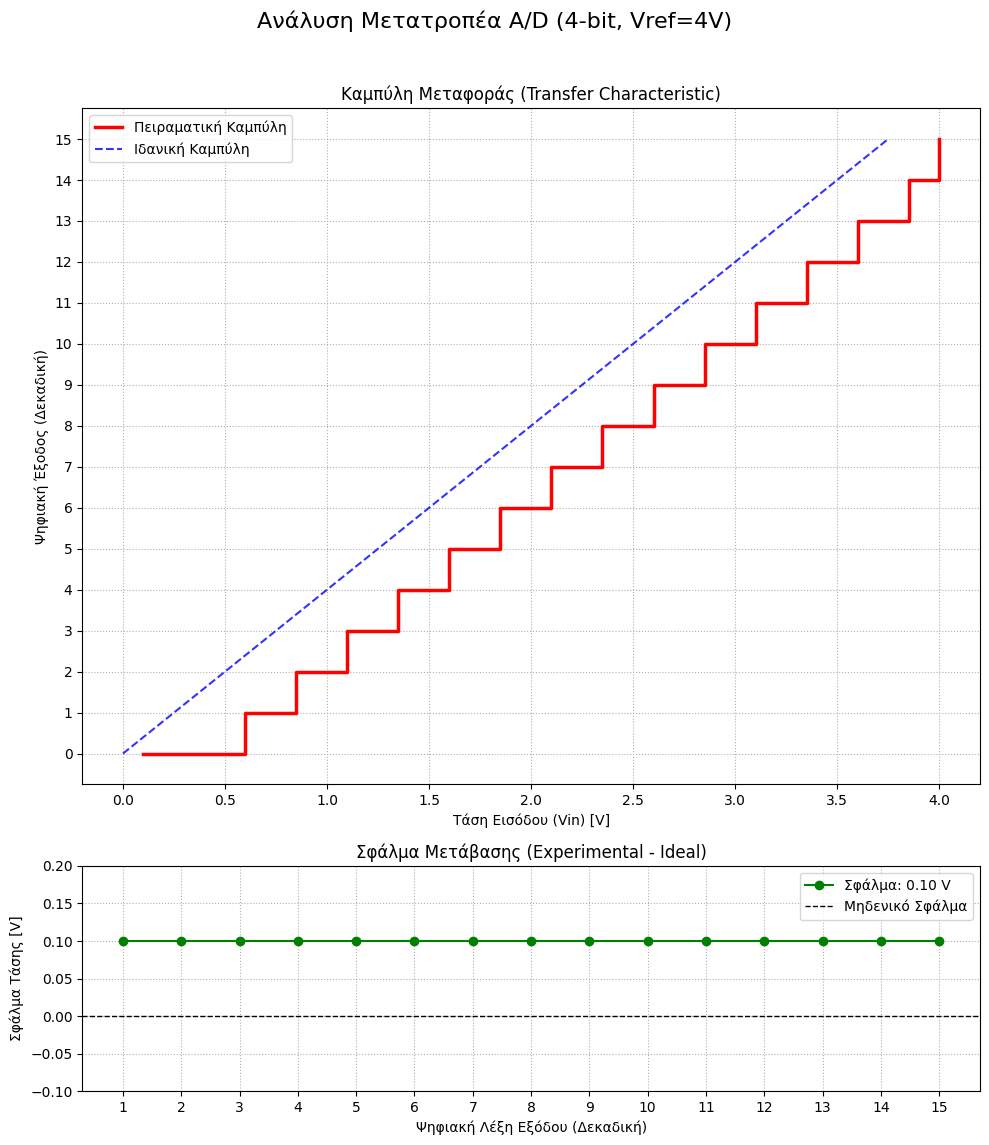

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Δεδομένα ---
# Θεωρητικές τιμές
N_bits = 4
V_ref = 4.0
Q = V_ref / (2**N_bits)

# Πειραματικές μετρήσεις (τιμές τάσης για κάθε μετάβαση ψηφιακής λέξης)
digital_codes = np.arange(1, 16)
measured_voltages = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])

# Θεωρητικές τάσεις μετάβασης
theoretical_voltages = digital_codes * Q

# --- Δημιουργία Διαγραμμάτων ---
# Ορισμός ελληνικών χαρακτήρων για τα γραφήματα
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Ανάλυση Μετατροπέα A/D (4-bit, Vref=4V)', fontsize=16)

# --- 1. Διάγραμμα Καμπύλης Μεταφοράς ---
ax1.set_title('Καμπύλη Μεταφοράς (Transfer Characteristic)')

# Σχεδίαση της πειραματικής καμπύλης (σκαλοπάτια)
# Προσθέτουμε την αρχική κατάσταση (0.1V -> code 0) και το τέλος του εύρους
plot_voltages = np.concatenate(([0.1], measured_voltages, [V_ref]))
plot_codes = np.concatenate(([0, 0], digital_codes))
ax1.step(plot_voltages, plot_codes, where='post', label='Πειραματική Καμπύλη', color='red', linewidth=2.5)

# Σχεδίαση της ιδανικής γραμμικής καμπύλης
ax1.plot([0, V_ref - Q], [0, 2**N_bits - 1], label='Ιδανική Καμπύλη', linestyle='--', color='blue', alpha=0.8)

ax1.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax1.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax1.set_xticks(np.arange(0, V_ref + 0.5, 0.5))
ax1.set_yticks(np.arange(0, 2**N_bits, 1))
ax1.legend()
ax1.grid(True, which='both', linestyle=':')

# --- 2. Διάγραμμα Σφάλματος ---
ax2.set_title('Σφάλμα Μετάβασης (Experimental - Ideal)')

# Υπολογισμός σφάλματος σε κάθε σημείο μετάβασης
transition_error = measured_voltages - theoretical_voltages

# Σχεδίαση του σφάλματος
ax2.plot(digital_codes, transition_error, marker='o', linestyle='-', color='green', label=f'Σφάλμα: {transition_error[0]:.2f} V')
ax2.axhline(0, color='black', linestyle='--', linewidth=1, label='Μηδενικό Σφάλμα')

ax2.set_xlabel('Ψηφιακή Λέξη Εξόδου (Δεκαδική)')
ax2.set_ylabel('Σφάλμα Τάσης [V]')
ax2.set_xticks(digital_codes)
ax2.set_ylim(-0.1, 0.2) # Προσαρμογή ορίων για καλύτερη οπτικοποίηση
ax2.legend()
ax2.grid(True, which='both', linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
# Αποθήκευση της εικόνας για χρήση στο LaTeX
plt.savefig('adc_characteristic.png', dpi=300)
plt.show()

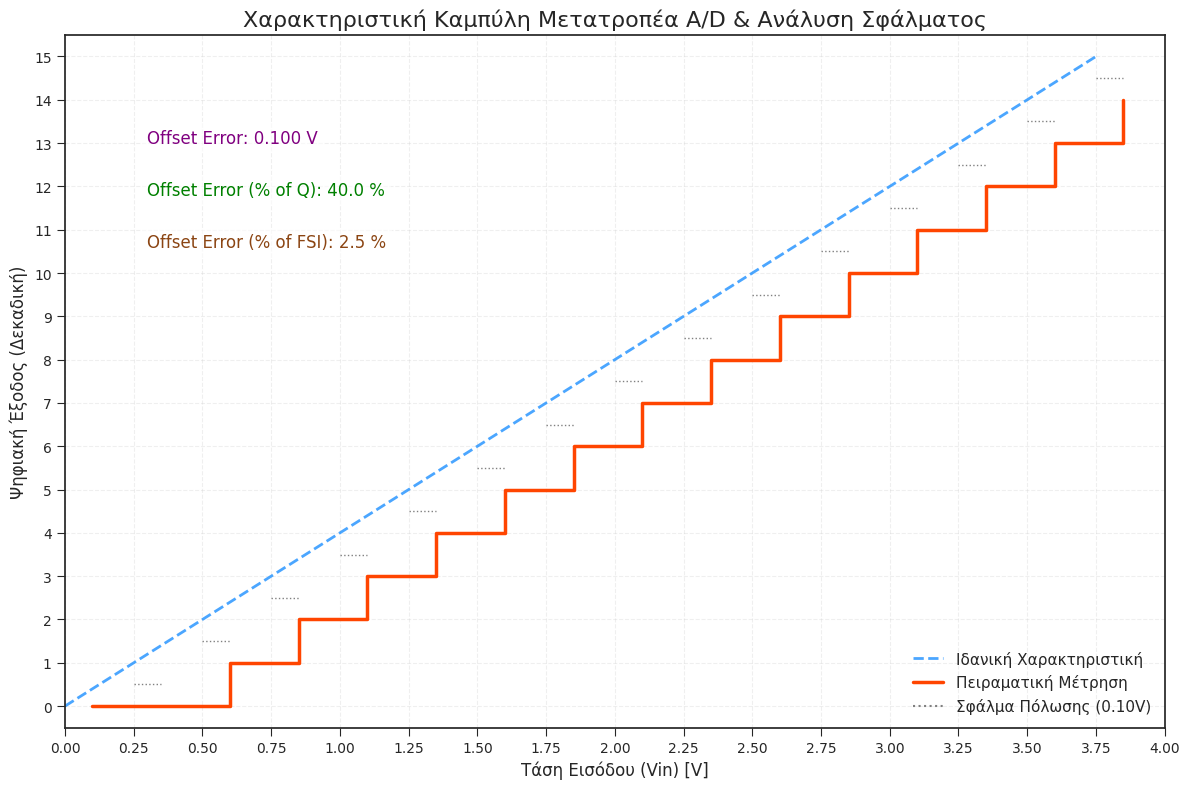

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΑΡΧΙΚΟΠΟΙΗΣΗ ΔΕΔΟΜΕΝΩΝ ΚΑΙ ΣΤΑΘΕΡΩΝ ---

# Θεωρητικές τιμές
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)  # Βήμα Κβαντισμού (Resolution)

# Πειραματικές μετρήσεις τάσης για κάθε μετάβαση
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])

# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP


# --- 2. ΥΠΟΛΟΓΙΣΜΟΣ ΣΦΑΛΜΑΤΩΝ ---

# Σφάλμα Πόλωσης (Offset Error) σε Volts
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]

# Σφάλμα Πόλωσης ως ποσοστό του Βήματος Κβαντισμού (Q)
offset_error_percent_q = (offset_error_v / Q_STEP) * 100

# Σφάλμα Πόλωσης ως ποσοστό του Εύρους Μέτρησης (FSI)
offset_error_percent_fsi = (offset_error_v / V_REF) * 100


# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΕΠΑΓΓΕΛΜΑΤΙΚΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---

# Επιλογή επαγγελματικού στυλ και ρύθμιση γραμματοσειράς
plt.style.use('seaborn-v0_8-ticks')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Δημιουργία του figure και του άξονα
fig, ax = plt.subplots(figsize=(12, 8))

# --- Σχεδίαση Καμπυλών ---

# α) Ιδανική γραμμική καμπύλη
ax.plot(
    [0, V_REF - Q_STEP], [0, 2**N_BITS - 1],
    linestyle='--', color='dodgerblue', alpha=0.8, lw=2,
    label='Ιδανική Χαρακτηριστική'
)

# β) Πειραματική καμπύλη σε μορφή σκάλας (step)
plot_voltages = np.concatenate(([0.1], measured_transition_v)) # Χρησιμοποιούμε 0.1V ως αρχή
plot_codes = np.concatenate(([0], digital_codes - 1)) # Οι κωδικοί που αντιστοιχούν σε κάθε επίπεδο
ax.step(
    plot_voltages, plot_codes, where='post',
    color='orangered', lw=2.5, label='Πειραματική Μέτρηση'
)

# --- Οπτικοποίηση Σφάλματος Πόλωσης ---
# Σχεδίαση διακριτικών γραμμών που δείχνουν το σφάλμα σε κάθε βήμα
for i, code in enumerate(digital_codes):
    ax.plot(
        [theoretical_transition_v[i], measured_transition_v[i]],
        [code - 0.5, code - 0.5], # Τοποθέτηση στο μέσο του σκαλοπατιού
        linestyle=':', color='grey', lw=1
    )
# Προσθήκη ετικέτας μόνο για την πρώτη γραμμή σφάλματος για να μην γεμίσει το legend
ax.plot([], [], linestyle=':', color='grey', label=f'Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')


# --- Προσθήκη Τιμών Σφαλμάτων στο Διάγραμμα ---
# Δημιουργία ενός "κουτιού" κειμένου για τα σφάλματα
error_text = (
    f'Offset Error: {offset_error_v:.3f} V\n'
    f'Offset Error (% of Q): {offset_error_percent_q:.1f} %\n'
    f'Offset Error (% of FSI): {offset_error_percent_fsi:.1f} %'
)
# Ορισμός χρωμάτων για κάθε γραμμή
colors = ['purple', 'green', 'saddlebrown']
text_lines = error_text.split('\n')

# Τοποθέτηση του κειμένου γραμμή-γραμμή με διαφορετικά χρώματα
for i, line in enumerate(text_lines):
    ax.text(0.3, 13 - (i * 1.2), line, fontsize=12, color=colors[i],
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


# --- Τελικές Ρυθμίσεις Διαγράμματος ---
ax.set_title('Χαρακτηριστική Καμπύλη Μετατροπέα A/D & Ανάλυση Σφάλματος')
ax.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 2**N_BITS, 1))
ax.set_xlim(0, V_REF)
ax.set_ylim(-0.5, 15.5)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
fig.tight_layout()

# Αποθήκευση της εικόνας σε υψηλή ανάλυση
plt.savefig('professional_adc_plot.png', dpi=300)

# Εμφάνιση του διαγράμματος
plt.show()

<>:96: SyntaxWarning: invalid escape sequence '\ '
<>:97: SyntaxWarning: invalid escape sequence '\%'
<>:97: SyntaxWarning: invalid escape sequence '\ '
<>:98: SyntaxWarning: invalid escape sequence '\%'
<>:98: SyntaxWarning: invalid escape sequence '\ '
<>:96: SyntaxWarning: invalid escape sequence '\ '
<>:97: SyntaxWarning: invalid escape sequence '\%'
<>:97: SyntaxWarning: invalid escape sequence '\ '
<>:98: SyntaxWarning: invalid escape sequence '\%'
<>:98: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-3502888135.py:96: SyntaxWarning: invalid escape sequence '\ '
  f'• Σφάλμα Πόλωσης: $\\bf{{{offset_error_v:.3f}\ V}}$\n'
/tmp/ipython-input-3502888135.py:97: SyntaxWarning: invalid escape sequence '\%'
  f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
/tmp/ipython-input-3502888135.py:97: SyntaxWarning: invalid escape sequence '\ '
  f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
/tmp/ipython-input-35028

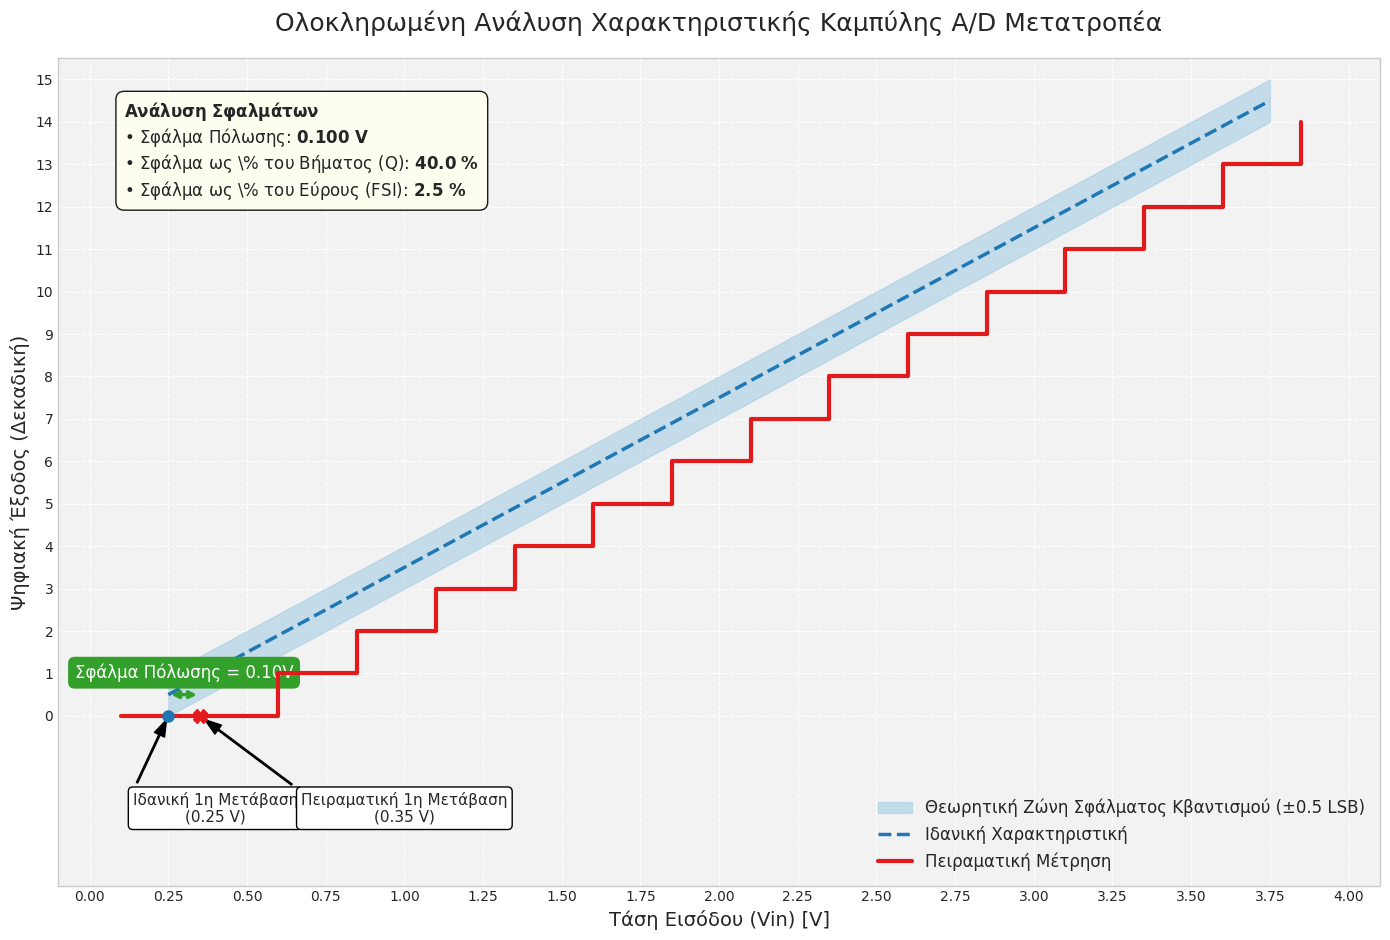

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΥΠΟΛΟΓΙΣΜΟΙ ---

# Θεωρητικές τιμές
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΚΟΡΥΦΑΙΑΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---

# Ρυθμίσεις αισθητικής για επαγγελματικό αποτέλεσμα
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f2f2f2'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['grid.linestyle'] = '--'

fig, ax = plt.subplots(figsize=(14, 9.5))

# --- Στοιχεία Γραφήματος ---

# α) Ζώνη Σφάλματος Κβαντισμού (+/- 0.5 LSB)
# Δημιουργούμε την πάνω και κάτω καμπύλη της ζώνης
ideal_line = (theoretical_transition_v / Q_STEP) - 0.5
ax.fill_between(
    theoretical_transition_v, ideal_line - 0.5, ideal_line + 0.5,
    color='#a6cee3', alpha=0.6,
    label='Θεωρητική Ζώνη Σφάλματος Κβαντισμού (±0.5 LSB)'
)

# β) Ιδανική Χαρακτηριστική Γραμμή (στο κέντρο της ζώνης)
ax.plot(
    theoretical_transition_v, ideal_line,
    linestyle='--', color='#1f78b4', lw=2.5,
    label='Ιδανική Χαρακτηριστική'
)

# γ) Πειραματική Καμπύλη (Σκαλοπάτια)
plot_voltages = np.concatenate(([0.1], measured_transition_v))
plot_codes = np.concatenate(([0], digital_codes - 1))
ax.step(
    plot_voltages, plot_codes, where='post',
    color='#e31a1c', lw=3, label='Πειραματική Μέτρηση', zorder=10
)

# --- Προηγμένες Επισημάνσεις (Annotations) ---

# δ) Σημείο Ιδανικής 1ης Μετάβασης
ax.plot(Q_STEP, 0, 'o', color='#1f78b4', markersize=8, zorder=11)
ax.annotate(
    'Ιδανική 1η Μετάβαση\n(0.25 V)', xy=(Q_STEP, 0), xytext=(0.4, -2.5),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=11, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
)

# ε) Σημείο Πειραματικής 1ης Μετάβασης
ax.plot(measured_transition_v[0], 0, 'X', color='#e31a1c', markersize=10, zorder=11)
ax.annotate(
    'Πειραματική 1η Μετάβαση\n(0.35 V)', xy=(measured_transition_v[0], 0), xytext=(1.0, -2.5),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=11, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
)

# στ) Οπτικοποίηση του Σφάλματος Πόλωσης με μπάρα
ax.annotate(
    '', xy=(Q_STEP, 0.5), xytext=(measured_transition_v[0], 0.5),
    arrowprops=dict(arrowstyle='<->', color='#33a02c', lw=2.5)
)
ax.text(
    (Q_STEP + measured_transition_v[0]) / 2, 0.8,
    f'Σφάλμα Πόλωσης = {offset_error_v:.2f}V',
    ha='center', va='bottom', fontsize=12, color='white',
    bbox=dict(boxstyle="round,pad=0.4", fc='#33a02c', ec='none')
)

# ζ) Κουτί με τα αποτελέσματα των σφαλμάτων
error_text = (
    f'$\\bf{{Ανάλυση\\ Σφαλμάτων}}$\n'
    f'• Σφάλμα Πόλωσης: $\\bf{{{offset_error_v:.3f}\ V}}$\n'
    f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
    f'• Σφάλμα ως \% του Εύρους (FSI): $\\bf{{{offset_error_percent_fsi:.1f}\ \%}}$'
)
ax.text(
    0.05, 0.95, error_text, transform=ax.transAxes, fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.9)
)

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Ολοκληρωμένη Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα', fontsize=18, pad=20)
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(-0.1, V_REF + 0.1)
ax.set_ylim(-4, 15.5) # Αυξημένο όριο για να χωρέσουν οι επισημάνσεις
ax.legend(loc='lower right', fontsize=12, facecolor='white', framealpha=0.8, shadow=True)
fig.tight_layout()

# Αποθήκευση & Εμφάνιση
plt.savefig('ultimate_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

<>:102: SyntaxWarning: invalid escape sequence '\ '
<>:103: SyntaxWarning: invalid escape sequence '\%'
<>:103: SyntaxWarning: invalid escape sequence '\ '
<>:104: SyntaxWarning: invalid escape sequence '\%'
<>:104: SyntaxWarning: invalid escape sequence '\ '
<>:102: SyntaxWarning: invalid escape sequence '\ '
<>:103: SyntaxWarning: invalid escape sequence '\%'
<>:103: SyntaxWarning: invalid escape sequence '\ '
<>:104: SyntaxWarning: invalid escape sequence '\%'
<>:104: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-117929955.py:102: SyntaxWarning: invalid escape sequence '\ '
  f'• Σφάλμα Πόλωσης: $\\bf{{{offset_error_v:.3f}\ V}}$\n'
/tmp/ipython-input-117929955.py:103: SyntaxWarning: invalid escape sequence '\%'
  f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
/tmp/ipython-input-117929955.py:103: SyntaxWarning: invalid escape sequence '\ '
  f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
/tmp/ipython-i

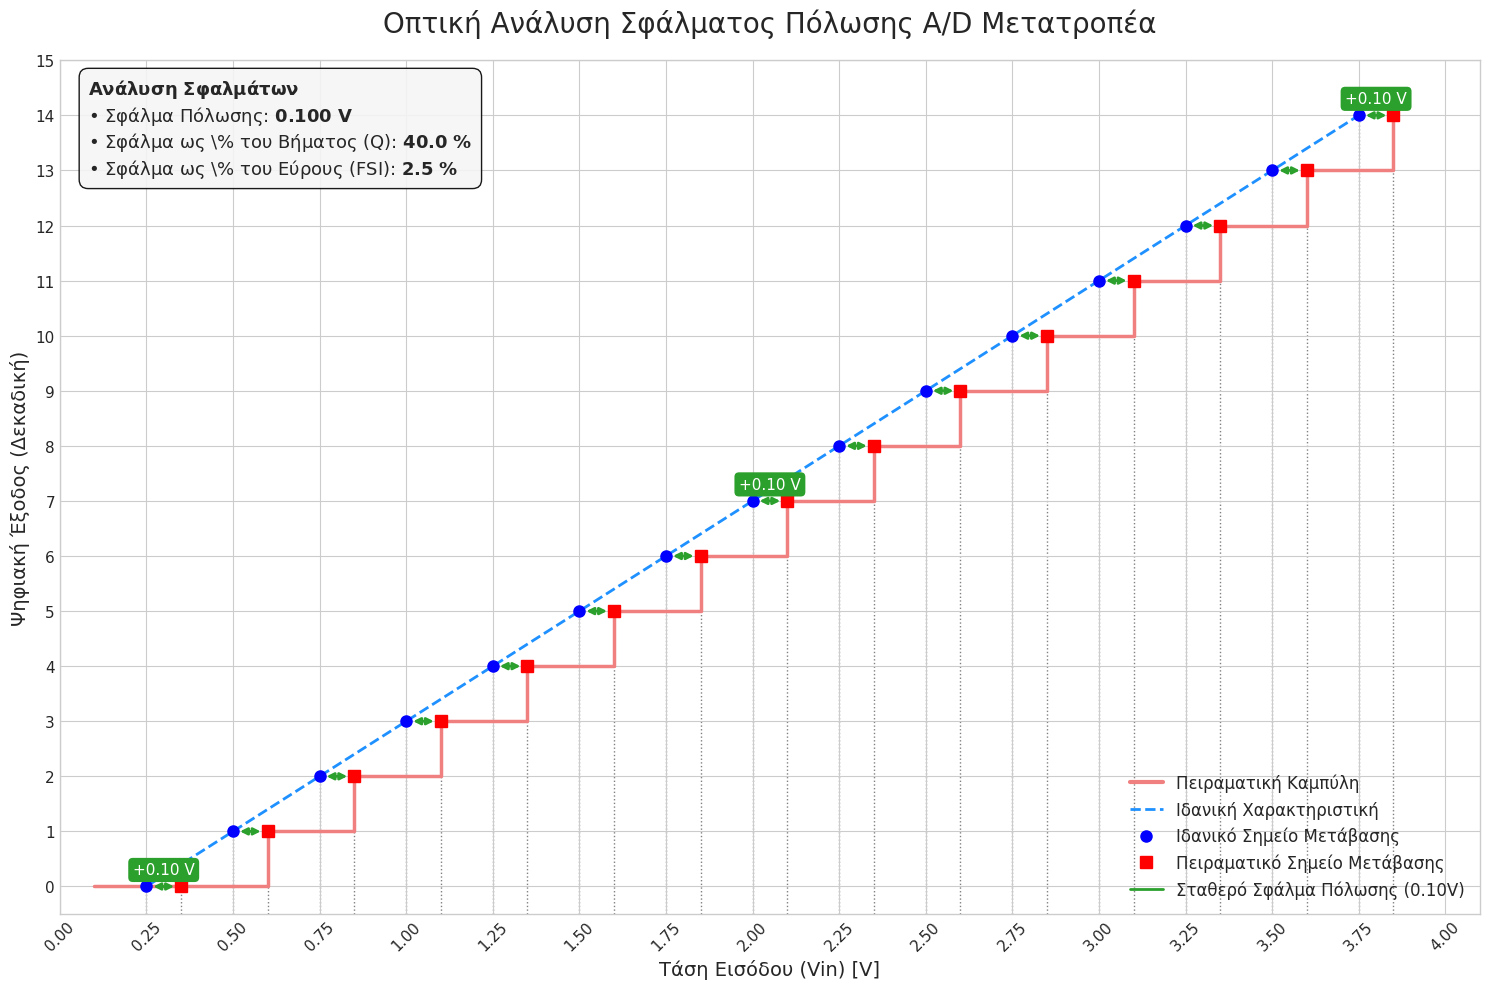

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΗΣ ΠΙΟ ΞΕΚΑΘΑΡΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15, 10))

# --- Στοιχεία Γραφήματος ---

# α) Πειραματική Καμπύλη (Σκαλοπάτια) - Διακριτική για υπόβαθρο
plot_voltages = np.concatenate(([0.1], measured_transition_v))
plot_codes = np.concatenate(([0], digital_codes -1)) # Κωδικός πριν την μετάβαση
ax.step(plot_voltages, plot_codes, where='post', color='lightcoral', lw=2.5, label='Πειραματική Καμπύλη', zorder=1)

# β) Ιδανική Χαρακτηριστική Γραμμή
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική', zorder=2)


# --- Οπτικοποίηση Σφαλμάτων με Βέλη ---
for i in range(len(digital_codes)):
    ideal_x = theoretical_transition_v[i]
    measured_x = measured_transition_v[i]
    y_level = digital_codes[i] - 1

    # γ) Σχεδίαση κάθε ιδανικού και πειραματικού σημείου
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=8, zorder=3)
    ax.plot(measured_x, y_level, 's', color='red', markersize=8, zorder=3)

    # δ) Σύνδεση με διακριτικές γραμμές αναφοράς
    ax.plot([ideal_x, ideal_x], [-0.5, y_level], color='grey', linestyle=':', lw=1, zorder=0)
    ax.plot([measured_x, measured_x], [-0.5, y_level], color='grey', linestyle=':', lw=1, zorder=0)

    # ε) Σχεδίαση του βέλους που δείχνει το σφάλμα
    ax.annotate(
        "", # no text
        xy=(measured_x, y_level),
        xytext=(ideal_x, y_level),
        arrowprops=dict(arrowstyle="<|-|>", color='#2ca02c', lw=2, shrinkA=5, shrinkB=5),
        zorder=4
    )

# --- Προσθήκη Ετικετών σε Επιλεγμένα Βέλη ---
# Προσθέτουμε ετικέτες για το πρώτο, το μεσαίο και το τελευταίο σημείο
indices_to_label = [0, 7, 14]
for i in indices_to_label:
    ax.text(
        (theoretical_transition_v[i] + measured_transition_v[i]) / 2,
        digital_codes[i] - 0.7, # Λίγο πιο κάτω από το βέλος
        f'+{offset_error_v:.2f} V',
        ha='center', va='center', fontsize=11, color='white',
        bbox=dict(boxstyle="round,pad=0.3", fc='#2ca02c', ec='none')
    )

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Οπτική Ανάλυση Σφάλματος Πόλωσης A/D Μετατροπέα', fontsize=20, pad=20)
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-0.5, 15)

# Δημιουργία "ψεύτικων" γραμμών για ένα καθαρό υπόμνημα
legend_elements = [
    plt.Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    plt.Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    plt.Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], color='#2ca02c', lw=2, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=12, facecolor='white', framealpha=1, shadow=True)

# Κουτί με τα τελικά αποτελέσματα
error_text = (
    f'$\\bf{{Ανάλυση\\ Σφαλμάτων}}$\n'
    f'• Σφάλμα Πόλωσης: $\\bf{{{offset_error_v:.3f}\ V}}$\n'
    f'• Σφάλμα ως \% του Βήματος (Q): $\\bf{{{offset_error_percent_q:.1f}\ \%}}$\n'
    f'• Σφάλμα ως \% του Εύρους (FSI): $\\bf{{{offset_error_percent_fsi:.1f}\ \%}}$'
)
ax.text(
    0.02, 0.98, error_text, transform=ax.transAxes, fontsize=13,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=0.9)
)

fig.tight_layout()

# Αποθήκευση & Εμφάνιση
plt.savefig('definitive_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

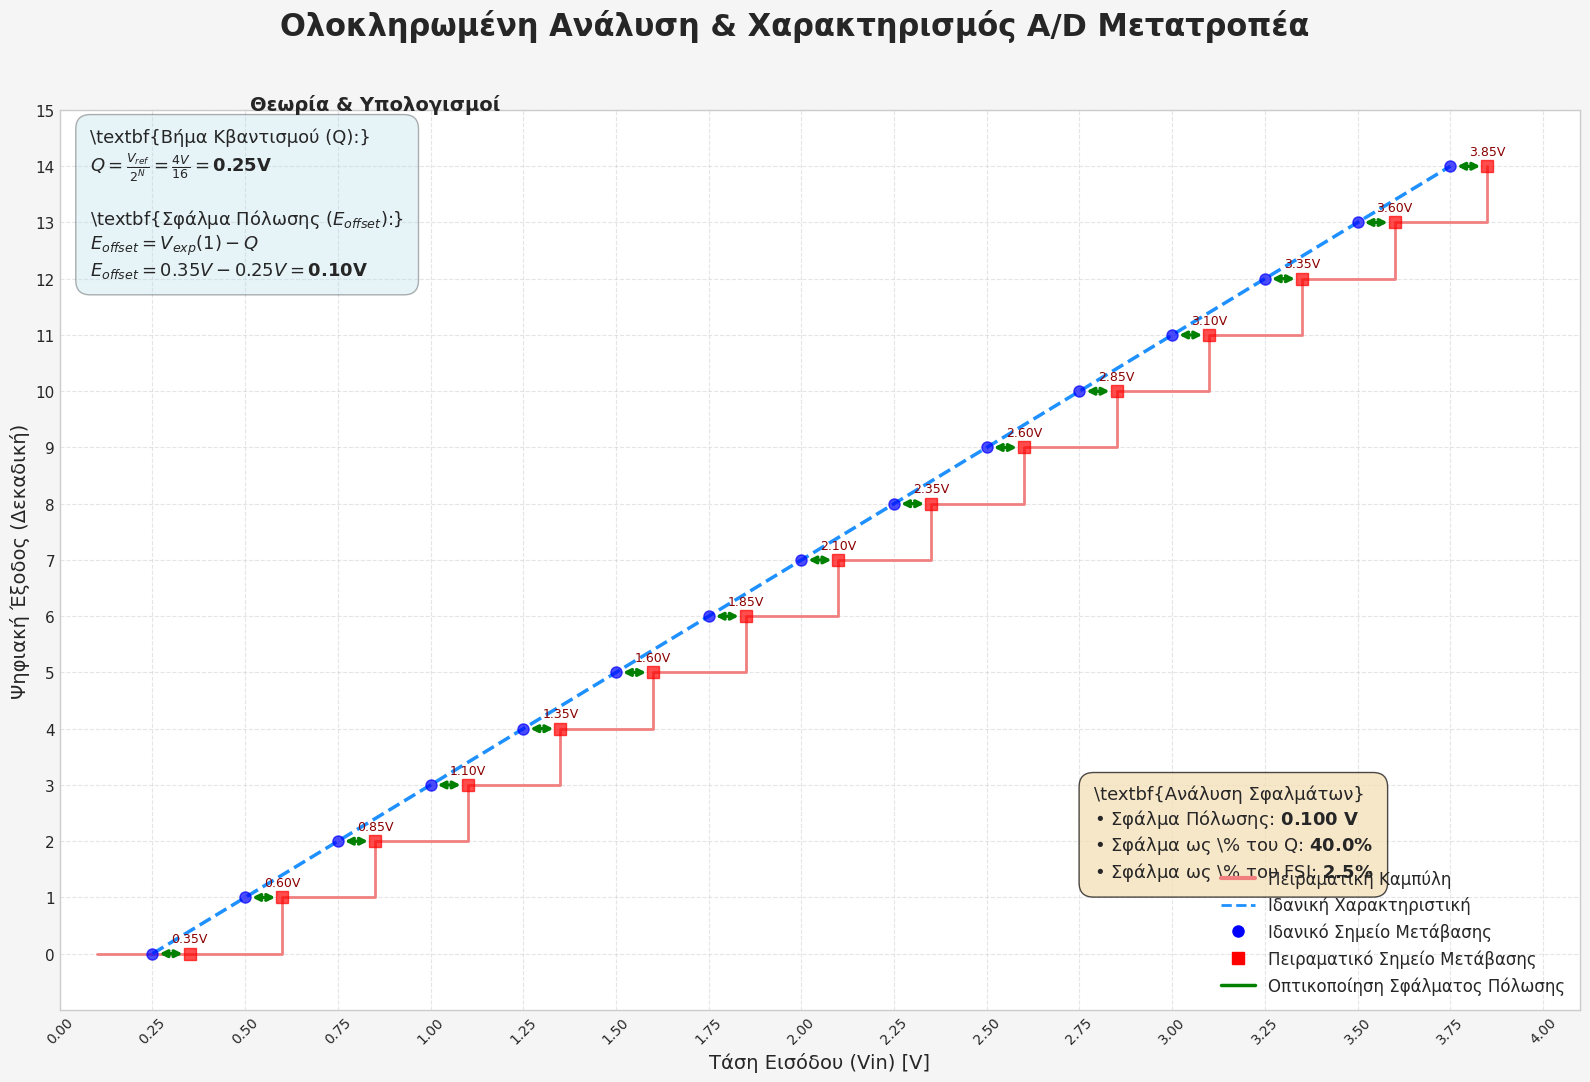

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ-"Dashboard" ---
# Ρυθμίσεις αισθητικής για επαγγελματικό αποτέλεσμα
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = '#f5f5f5' # Ελαφρύ γκρι φόντο
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(16, 11))
fig.suptitle('Ολοκληρωμένη Ανάλυση & Χαρακτηρισμός A/D Μετατροπέα', fontsize=22, weight='bold')

# --- Στοιχεία Γραφήματος ---

# α) Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, label='Πειραματική Καμπύλη', zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, label='Ιδανική Χαρακτηριστική', zorder=2)

# --- Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες ---
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1

    # Σχεδίαση σημείων (Ιδανικό 'o' και Πειραματικό 's')
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=8, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=8, zorder=3, alpha=0.7)

    # Προσθήκη ετικέτας με την τιμή της τάσης σε κάθε πειραματικό σημείο
    ax.text(measured_x, y_level + 0.2, f'{measured_x:.2f}V', ha='center', fontsize=9, color='darkred')

    # Βέλος που δείχνει το σφάλμα
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2.5, shrinkA=5, shrinkB=5), zorder=4)

# --- Ενσωμάτωση Τύπων LaTeX και Αποτελεσμάτων ---

# α) Πλαίσιο με τους Τύπους και τους Υπολογισμούς
formula_text = (
    r'\textbf{Βήμα Κβαντισμού (Q):}'
    '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = \mathbf{0.25V}$'
    '\n\n'
    r'\textbf{Σφάλμα Πόλωσης ($E_{offset}$):}'
    '\n'
    r'$E_{offset} = V_{exp}(1) - Q$'
    '\n'
    r'$E_{offset} = 0.35V - 0.25V = \mathbf{0.10V}$'
)
ax.text(0.02, 0.98, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.3))
# Προσθήκη του τίτλου του πλαισίου ξεχωριστά για να αποφύγουμε σφάλματα
ax.text(0.125, 1.0, r'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, weight='bold')


# β) Πλαίσιο με την Τελική Ανάλυση Σφαλμάτων
# ΔΙΟΡΘΩΣΗ: Χρησιμοποιούμε διπλά backslash για το σύμβολο του ποσοστού (%) μέσα σε f-string
results_text = (
    r'\textbf{Ανάλυση Σφαλμάτων}'
    '\n'
    f'• Σφάλμα Πόλωσης: $\\mathbf{{{offset_error_v:.3f}\\ V}}$\n'
    f'• Σφάλμα ως \\% του Q: $\\mathbf{{{offset_error_percent_q:.1f}\\%}}$\n'
    f'• Σφάλμα ως \\% του FSI: $\\mathbf{{{offset_error_percent_fsi:.1f}\\%}}$'
)
ax.text(0.68, 0.25, results_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.7))


# --- Τελικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15)
ax.grid(True, which='both', linestyle='--', alpha=0.5)

# Δημιουργία Υπομνήματος
legend_elements = [
    plt.Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    plt.Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    plt.Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], color='green', lw=2.5, label='Οπτικοποίηση Σφάλματος Πόλωσης')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=12, facecolor='white', framealpha=0.9, shadow=True)

fig.tight_layout(rect=[0, 0, 1, 0.96]) # Προσαρμογή για τον γενικό τίτλο

# Αποθήκευση & Εμφάνιση
plt.savefig('final_adc_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

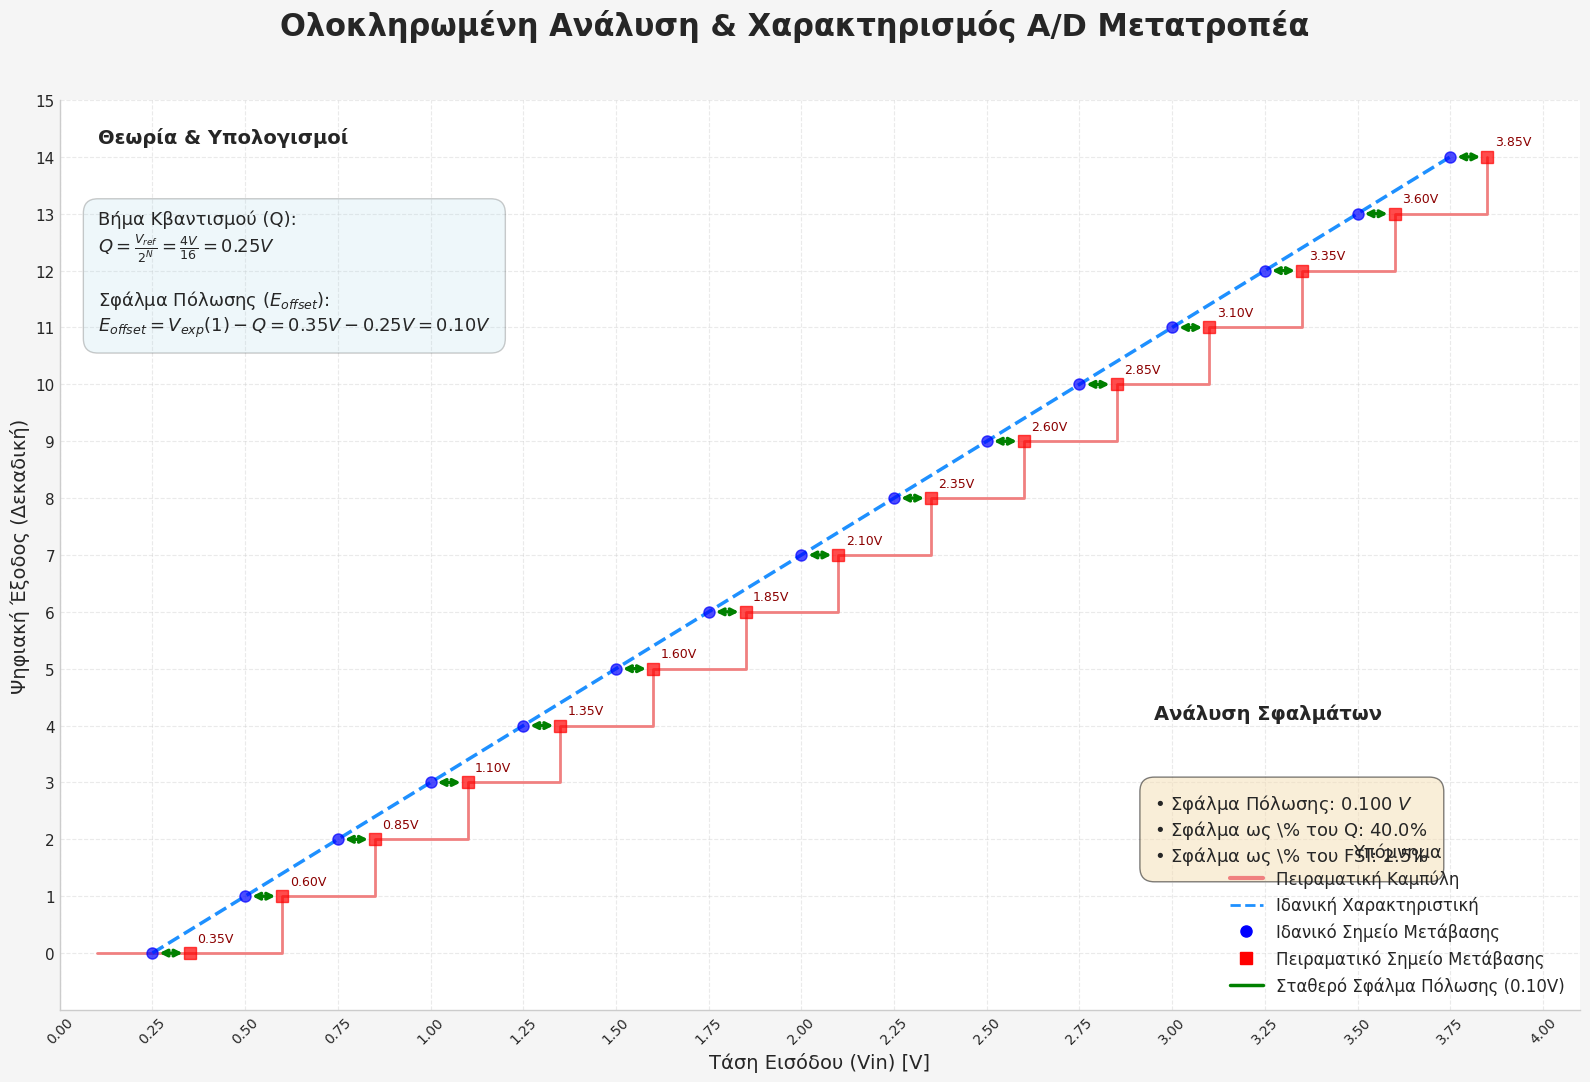

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής για επαγγελματικό αποτέλεσμα
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = '#f5f5f5'
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(16, 11))
fig.suptitle('Ολοκληρωμένη Ανάλυση & Χαρακτηρισμός A/D Μετατροπέα', fontsize=22, weight='bold')

# --- Στοιχεία Γραφήματος ---
# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, label='Πειραματική Καμπύλη', zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, label='Ιδανική Χαρακτηριστική', zorder=2)

# --- Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες ---
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1

    # Σχεδίαση σημείων
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=8, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=8, zorder=3, alpha=0.7)

    # Προσθήκη ετικέτας με την τιμή της τάσης
    ax.text(measured_x + 0.02, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')

    # Βέλος που δείχνει το σφάλμα
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2.5, shrinkA=5, shrinkB=5), zorder=4)

# --- Ενσωμάτωση Πληροφοριακών Πλαισίων ---

# α) Πλαίσιο με τους Τύπους και τους Υπολογισμούς
ax.text(0.025, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$' '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):' '\n'
    r'$E_{offset} = V_{exp}(1) - Q = 0.35V - 0.25V = 0.10V$'
)
ax.text(0.025, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

# β) Πλαίσιο με την Τελική Ανάλυση Σφαλμάτων
ax.text(0.72, 0.32, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold')
results_text = (
    f'• Σφάλμα Πόλωσης: ${offset_error_v:.3f}\\ V$\n'
    f'• Σφάλμα ως \\% του Q: ${offset_error_percent_q:.1f}\\%$\n'
    f'• Σφάλμα ως \\% του FSI: ${offset_error_percent_fsi:.1f}\\%$'
)
ax.text(0.72, 0.24, results_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))

# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15)

# Αφαίρεση του πάνω και δεξιού περιγράμματος για μοντέρνα εμφάνιση
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4) # Πιο διακριτικό πλέγμα

# Δημιουργία Υπομνήματος
legend_elements = [
    plt.Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    plt.Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    plt.Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13', loc='lower right',
                   fontsize=12, facecolor='white', framealpha=0.9, shadow=True)

fig.tight_layout(rect=[0, 0, 1, 0.96])

# Αποθήκευση & Εμφάνιση
plt.savefig('ultimate_professional_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

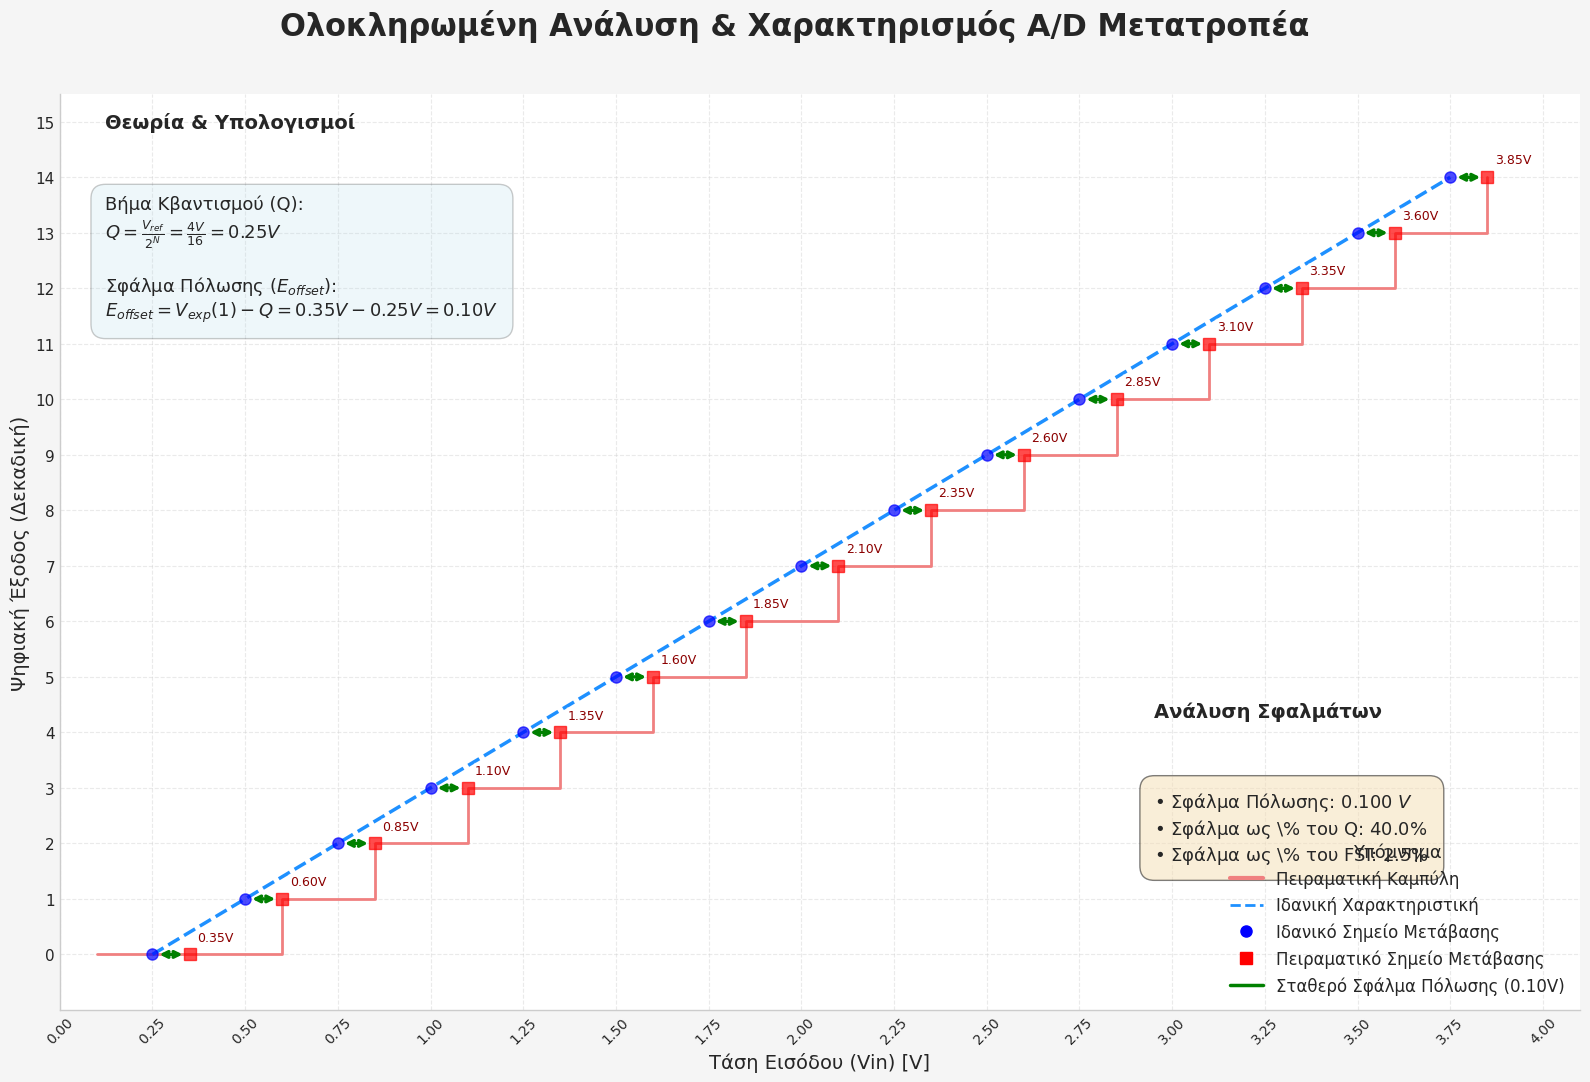

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής για επαγγελματικό αποτέλεσμα
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = '#f5f5f5'
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(16, 11))
fig.suptitle('Ολοκληρωμένη Ανάλυση & Χαρακτηρισμός A/D Μετατροπέα', fontsize=22, weight='bold')

# --- Στοιχεία Γραφήματος ---
# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, label='Πειραματική Καμπύλη', zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, label='Ιδανική Χαρακτηριστική', zorder=2)

# --- Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες ---
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1

    # Σχεδίαση σημείων
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=8, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=8, zorder=3, alpha=0.7)

    # Προσθήκη ετικέτας με την τιμή της τάσης (με υπόβαθρο για ευκρίνεια)
    ax.text(measured_x + 0.02, y_level + 0.25, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.1'))

    # Βέλος που δείχνει το σφάλμα
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2.5, shrinkA=5, shrinkB=5), zorder=4)

# --- Ενσωμάτρωση Πληροφοριακών Πλαισίων ---

# α) Πλαίσιο με τους Τύπους και τους Υπολογισμούς (σε νέα, ασφαλή θέση)
ax.text(0.03, 0.98, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$' '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):' '\n'
    r'$E_{offset} = V_{exp}(1) - Q = 0.35V - 0.25V = 0.10V$'
)
ax.text(0.03, 0.89, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

# β) Πλαίσιο με την Τελική Ανάλυση Σφαλμάτων
ax.text(0.72, 0.32, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold')
results_text = (
    f'• Σφάλμα Πόλωσης: ${offset_error_v:.3f}\\ V$\n'
    f'• Σφάλμα ως \\% του Q: ${offset_error_percent_q:.1f}\\%$\n'
    f'• Σφάλμα ως \\% του FSI: ${offset_error_percent_fsi:.1f}\\%$'
)
ax.text(0.72, 0.24, results_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))


# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)

# Αφαίρεση του πάνω και δεξιού περιγράμματος για μοντέρνα εμφάνιση
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

# Δημιουργία Υπομνήματος
legend_elements = [
    plt.Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    plt.Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    plt.Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13', loc='lower right',
                   fontsize=12, facecolor='white', framealpha=0.9, shadow=True)

fig.tight_layout(rect=[0, 0, 1, 0.96])

# Αποθήκευση & Εμφάνιση
plt.savefig('final_professional_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

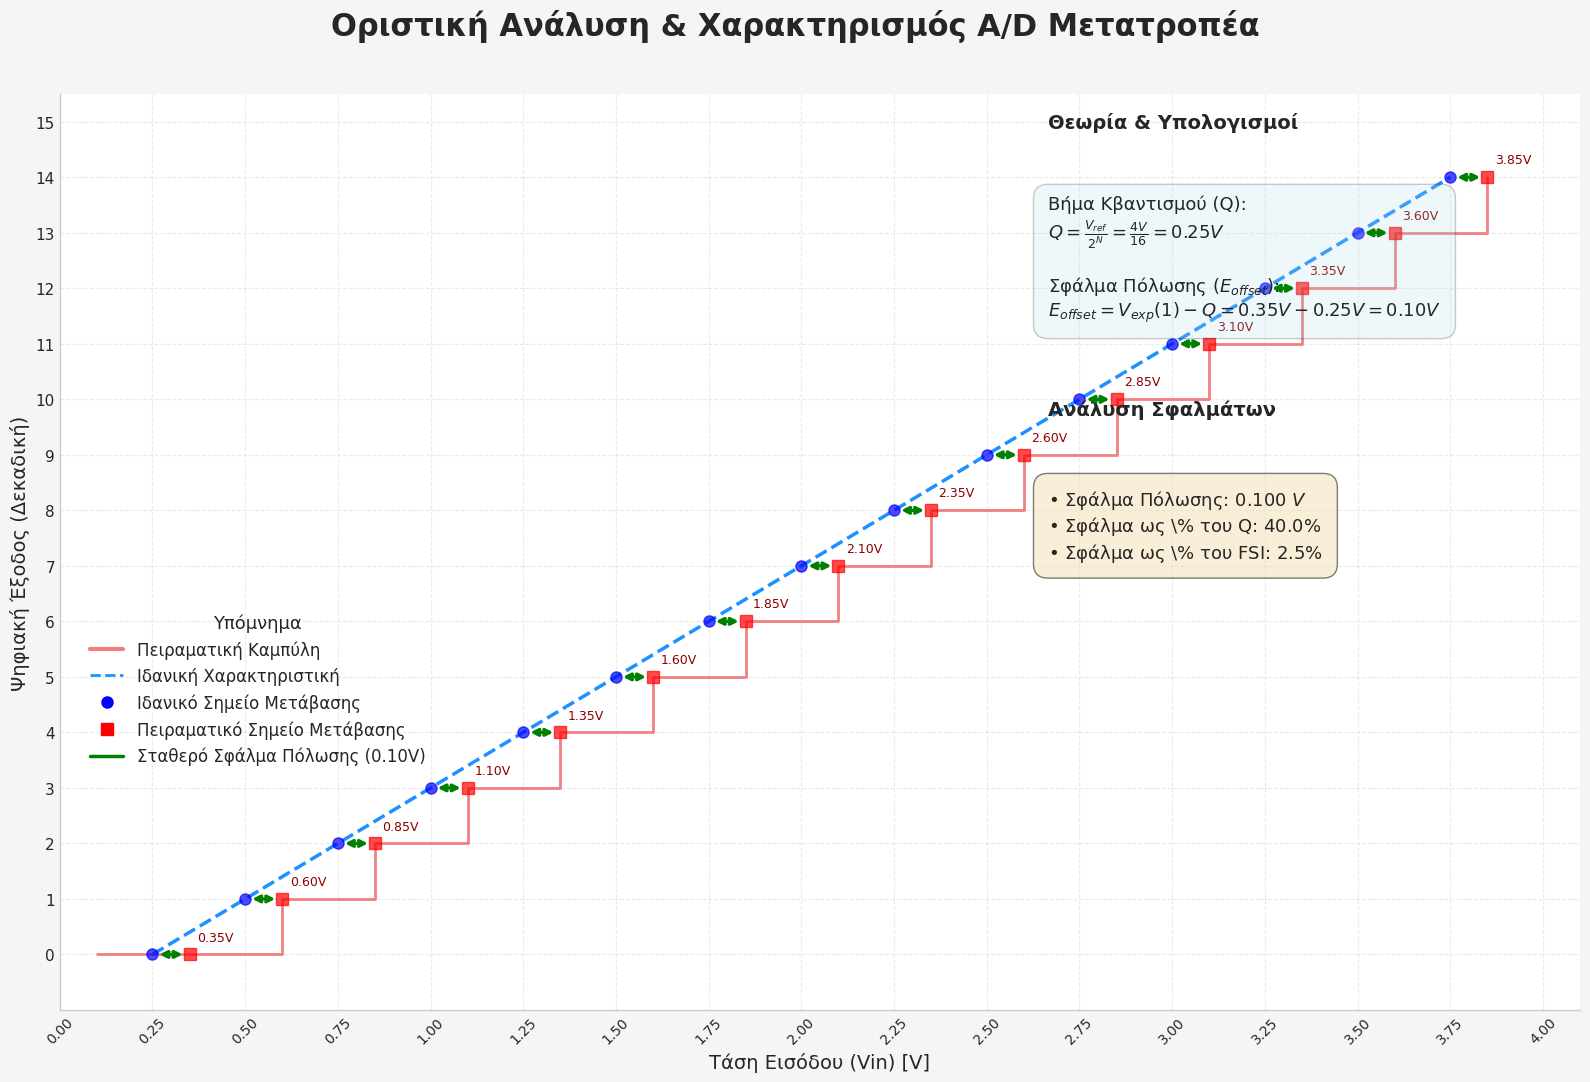

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής για επαγγελματικό αποτέλεσμα
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = '#f5f5f5'
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(16, 11))
fig.suptitle('Οριστική Ανάλυση & Χαρακτηρισμός A/D Μετατροπέα', fontsize=22, weight='bold')

# --- Στοιχεία Γραφήματος ---
# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, label='Πειραματική Καμπύλη', zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, label='Ιδανική Χαρακτηριστική', zorder=2)

# --- Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες ---
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1

    # Σχεδίαση σημείων
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=8, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=8, zorder=3, alpha=0.7)

    # Προσθήκη ετικέτας με την τιμή της τάσης
    ax.text(measured_x + 0.02, y_level + 0.25, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.1'))

    # Βέλος που δείχνει το σφάλμα
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2.5, shrinkA=5, shrinkB=5), zorder=4)

# --- Ενσωμάτωση Πληροφοριακών Πλαισίων (σε νέα, ασφαλή θέση) ---

# α) Πλαίσιο με τους Τύπους και τους Υπολογισμούς
ax.text(0.65, 0.98, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$' '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):' '\n'
    r'$E_{offset} = V_{exp}(1) - Q = 0.35V - 0.25V = 0.10V$'
)
ax.text(0.65, 0.89, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

# β) Πλαίσιο με την Τελική Ανάλυση Σφαλμάτων
ax.text(0.65, 0.65, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold')
results_text = (
    f'• Σφάλμα Πόλωσης: ${offset_error_v:.3f}\\ V$\n'
    f'• Σφάλμα ως \\% του Q: ${offset_error_percent_q:.1f}\\%$\n'
    f'• Σφάλμα ως \\% του FSI: ${offset_error_percent_fsi:.1f}\\%$'
)
ax.text(0.65, 0.57, results_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))


# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)

# Αφαίρεση του πάνω και δεξιού περιγράμματος
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

# Δημιουργία Υπομνήματος (σε νέα θέση)
legend_elements = [
    plt.Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    plt.Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    plt.Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13', loc='center left',
                   bbox_to_anchor=(0.01, 0.35), # Ακριβής τοποθέτηση
                   fontsize=12, facecolor='white', framealpha=0.9, shadow=True)

fig.tight_layout(rect=[0, 0, 1, 0.96])

# Αποθήκευση & Εμφάνιση
plt.savefig('final_professional_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f9f9f9'

# Δημιουργία Figure με προσαρμοσμένο μέγεθος για να χωρέσει το πάνελ
fig, ax = plt.subplots(figsize=(18, 10))
fig.subplots_adjust(right=0.7) # Δημιουργία χώρου στα δεξιά

# --- Στοιχεία Γραφήματος ---
ax.set_title('Χαρακτηριστική Καμπύλη & Ανάλυση Σφάλματος A/D Μετατροπέα', fontsize=20, pad=15)

# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# --- Πλαίσιο Πληροφοριών στα Δεξιά ---
info_panel_text = (
    # Section 1: Formulas
    r'$\bf{Θεωρία\ \&\ Υπολογισμοί}$'
    '\n'
    r'Βήμα Κβαντισμού (Q):'
    '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = \mathbf{0.25V}$'
    '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):'
    '\n'
    r'$E_{offset} = V_{exp}(1) - Q = 0.35V - 0.25V = \mathbf{0.10V}$'
    '\n'
    r'------------------------------------' # Διαχωριστικό
    '\n'
    # Section 2: Results
    r'$\bf{Ανάλυση\ Σφαλμάτων}$'
    '\n'
    f'• Σφάλμα Πόλωσης: $\\mathbf{{{offset_error_v:.3f}\\ V}}$\n'
    f'• Σφάλμα ως \\% του Q: $\\mathbf{{{offset_error_percent_q:.1f}\\%}}$\n'
    f'• Σφάλμα ως \\% του FSI: $\\mathbf{{{offset_error_percent_fsi:.1f}\\%}}$'
    '\n'
    r'------------------------------------' # Διαχωριστικό
    '\n'
    # Section 3: Legend (will be drawn over this)
    r'$\bf{Υπόμνημα}$'
)

# Τοποθέτηση του πλαισίου εκτός του γραφήματος
fig.text(0.72, 0.88, info_panel_text,
         ha='left', va='top', fontsize=12,
         bbox=dict(boxstyle='round,pad=1', facecolor='whitesmoke', alpha=0.9, edgecolor='grey'))

# Δημιουργία του Υπομνήματος χειροκίνητα μέσα στο πλαίσιο
legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
legend = fig.legend(handles=legend_elements,
                    loc='center left',
                    bbox_to_anchor=(0.73, 0.25), # Ακριβής τοποθέτηση μέσα στο πλαίσιο
                    fontsize=12,
                    frameon=False) # Χωρίς επιπλέον πλαίσιο για το υπόμνημα

# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

# Αποθήκευση & Εμφάνιση
plt.savefig('definitive_adc_dashboard_plot.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: 
$\bf{Θεωρία\ \&\ Υπολογισμοί}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x79ce917307c0> (for post_execute):


ValueError: 
$\bf{Θεωρία\ \&\ Υπολογισμοί}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

ValueError: 
$\bf{Θεωρία\ \&\ Υπολογισμοί}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1800x1000 with 1 Axes>

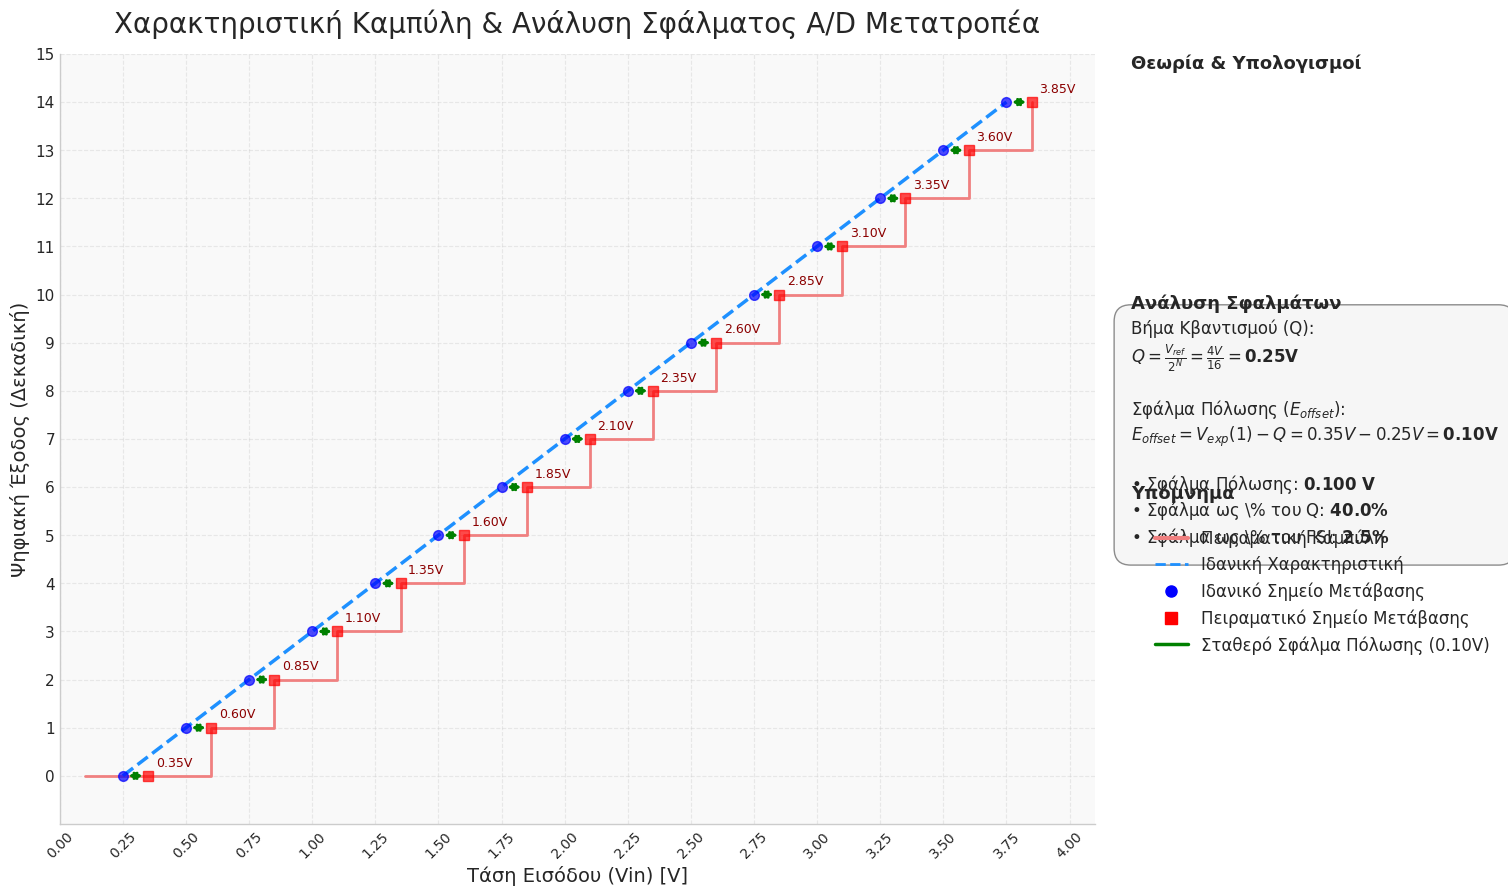

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f9f9f9'

# Δημιουργία Figure με προσαρμοσμένο μέγεθος για να χωρέσει το πάνελ
fig, ax = plt.subplots(figsize=(18, 10))
fig.subplots_adjust(right=0.7) # Δημιουργία χώρου στα δεξιά

# --- Στοιχεία Γραφήματος ---
ax.set_title('Χαρακτηριστική Καμπύλη & Ανάλυση Σφάλματος A/D Μετατροπέα', fontsize=20, pad=15)

# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# --- Πλαίσιο Πληροφοριών στα Δεξιά ---
info_panel_text = (
    # Section 1: Formulas
    r'Βήμα Κβαντισμού (Q):'
    '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = \mathbf{0.25V}$'
    '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):'
    '\n'
    r'$E_{offset} = V_{exp}(1) - Q = 0.35V - 0.25V = \mathbf{0.10V}$'
    '\n'
    # Section 2: Results
    '\n'
    f'• Σφάλμα Πόλωσης: $\\mathbf{{{offset_error_v:.3f}\\ V}}$\n'
    f'• Σφάλμα ως \\% του Q: $\\mathbf{{{offset_error_percent_q:.1f}\\%}}$\n'
    f'• Σφάλμα ως \\% του FSI: $\\mathbf{{{offset_error_percent_fsi:.1f}\\%}}$'
)

# Τοποθέτηση του πλαισίου εκτός του γραφήματος
fig.text(0.72, 0.5, info_panel_text,
         ha='left', va='center', fontsize=12,
         bbox=dict(boxstyle='round,pad=1', facecolor='whitesmoke', alpha=0.9, edgecolor='grey'))

# Προσθήκη των τίτλων πάνω από το κείμενο
fig.text(0.72, 0.88, 'Θεωρία & Υπολογισμοί', ha='left', va='top', fontsize=13, fontweight='bold')
fig.text(0.72, 0.64, 'Ανάλυση Σφαλμάτων', ha='left', va='top', fontsize=13, fontweight='bold')
fig.text(0.72, 0.45, 'Υπόμνημα', ha='left', va='top', fontsize=13, fontweight='bold')


# Δημιουργία του Υπομνήματος χειροκίνητα μέσα στο πλαίσιο
legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
legend = fig.legend(handles=legend_elements,
                    loc='upper left',
                    bbox_to_anchor=(0.725, 0.42), # Ακριβής τοποθέτηση μέσα στο πλαίσιο
                    fontsize=12,
                    frameon=False) # Χωρίς επιπλέον πλαίσιο

# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

# Αποθήκευση & Εμφάνιση
plt.savefig('definitive_adc_dashboard_plot.png', dpi=300, bbox_inches='tight')
plt.show()

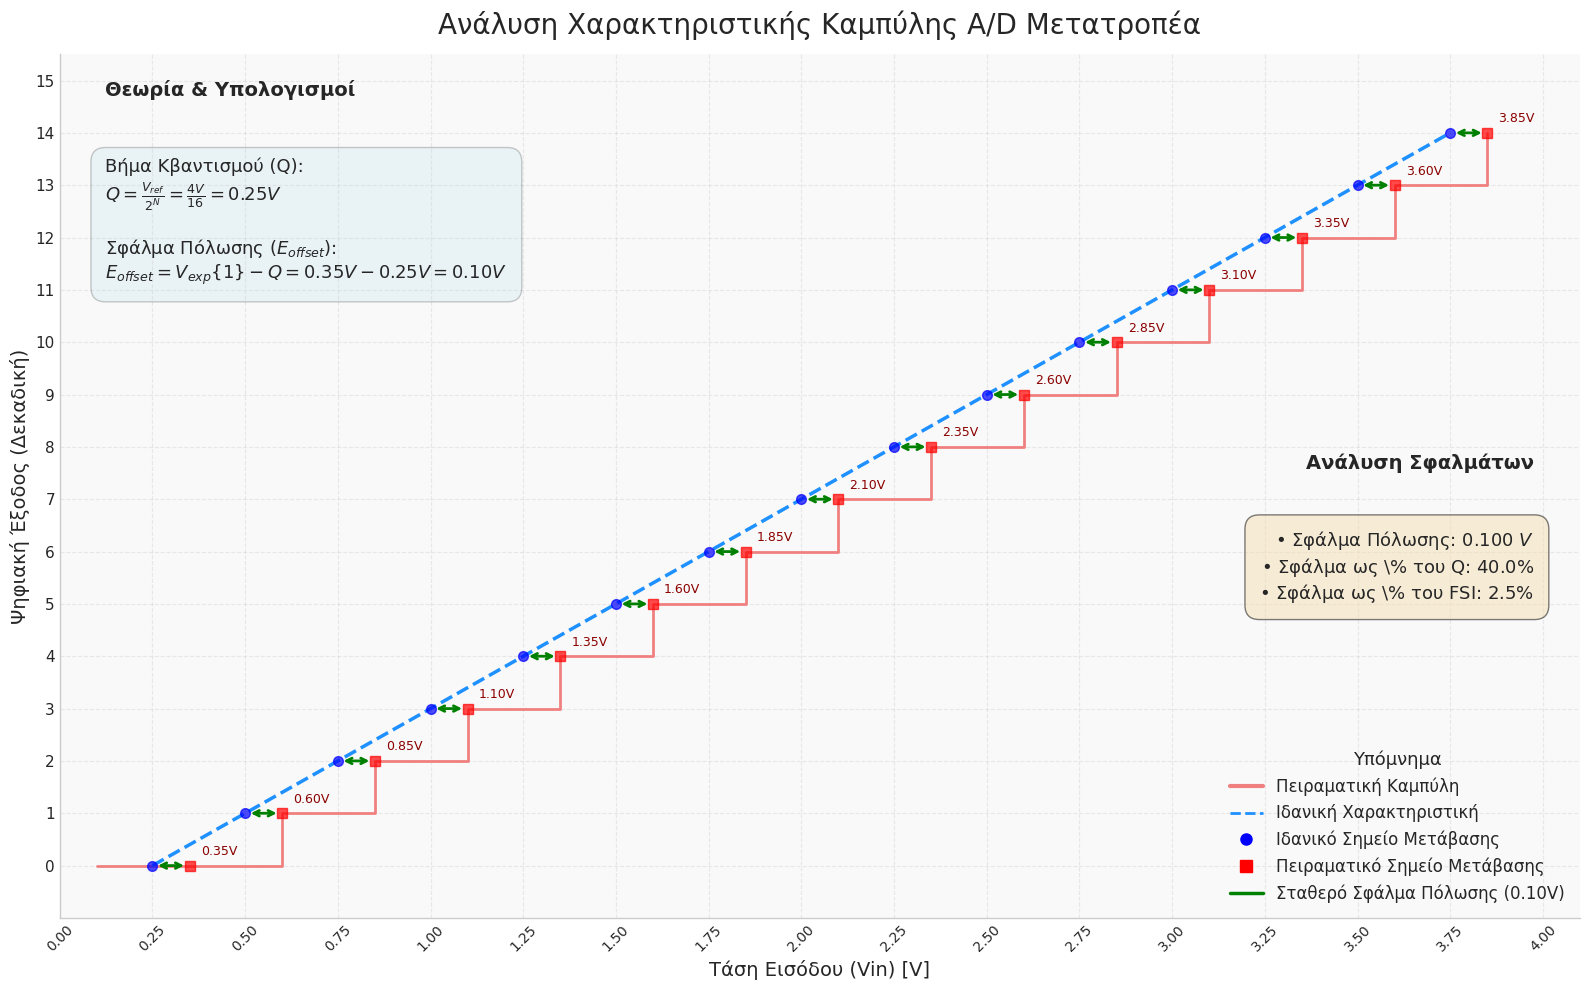

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
digital_codes = np.arange(1, 16)
measured_transition_v = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
# Θεωρητικές τάσεις μετάβασης
theoretical_transition_v = digital_codes * Q_STEP

# Υπολογισμός Σφαλμάτων
offset_error_v = measured_transition_v[0] - theoretical_transition_v[0]
offset_error_percent_q = (offset_error_v / Q_STEP) * 100
offset_error_percent_fsi = (offset_error_v / V_REF) * 100

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
# Ρυθμίσεις αισθητικής
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f9f9f9'

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα', fontsize=20, pad=15)

# --- Στοιχεία Γραφήματος ---
# Ιδανική Χαρακτηριστική Γραμμή και πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], measured_transition_v)),
        np.concatenate(([0], digital_codes - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
ideal_y = digital_codes - 1
ax.plot(theoretical_transition_v, ideal_y, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# Οπτικοποίηση Σφαλμάτων με Βέλη και Ετικέτες
for i in range(len(digital_codes)):
    ideal_x, measured_x = theoretical_transition_v[i], measured_transition_v[i]
    y_level = digital_codes[i] - 1

    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# --- Πλαίσιο Πληροφοριών (ΠΑΝΩ ΑΡΙΣΤΕΡΑ) ---
ax.text(0.03, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$' '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):' '\n'
    r'$E_{offset} = V_{exp}\{1\} - Q = 0.35V - 0.25V = 0.10V$'
)
ax.text(0.03, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))


# --- Πλαίσιο Αποτελεσμάτων & Υπομνήματος (ΚΑΤΩ ΔΕΞΙΑ) ---
legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({offset_error_v:.2f}V)')
]
# Δημιουργία του Υπομνήματος πρώτα για να υπολογίσουμε το μέγεθός του
legend = ax.legend(handles=legend_elements,
                   title='Υπόμνημα', title_fontsize='13',
                   loc='lower right',
                   fontsize=12, facecolor='white', framealpha=0.6, shadow=True)

# Κείμενο αποτελεσμάτων
results_text = (
    f'• Σφάλμα Πόλωσης: ${offset_error_v:.3f}\\ V$\n'
    f'• Σφάλμα ως \\% του Q: ${offset_error_percent_q:.1f}\\%$\n'
    f'• Σφάλμα ως \\% του FSI: ${offset_error_percent_fsi:.1f}\\%$'
)
# Τοποθέτηση του κειμένου πάνω από το υπόμνημα
ax.text(0.97, 0.45, results_text, transform=ax.transAxes, fontsize=13,
        horizontalalignment='right', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))
ax.text(0.97, 0.52, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold', horizontalalignment='right')


# --- Τελικές Αισθητικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

fig.tight_layout()

# Αποθήκευση & Εμφάνιση
plt.savefig('final_adc_plot_v3.png', dpi=300, bbox_inches='tight')
plt.show()

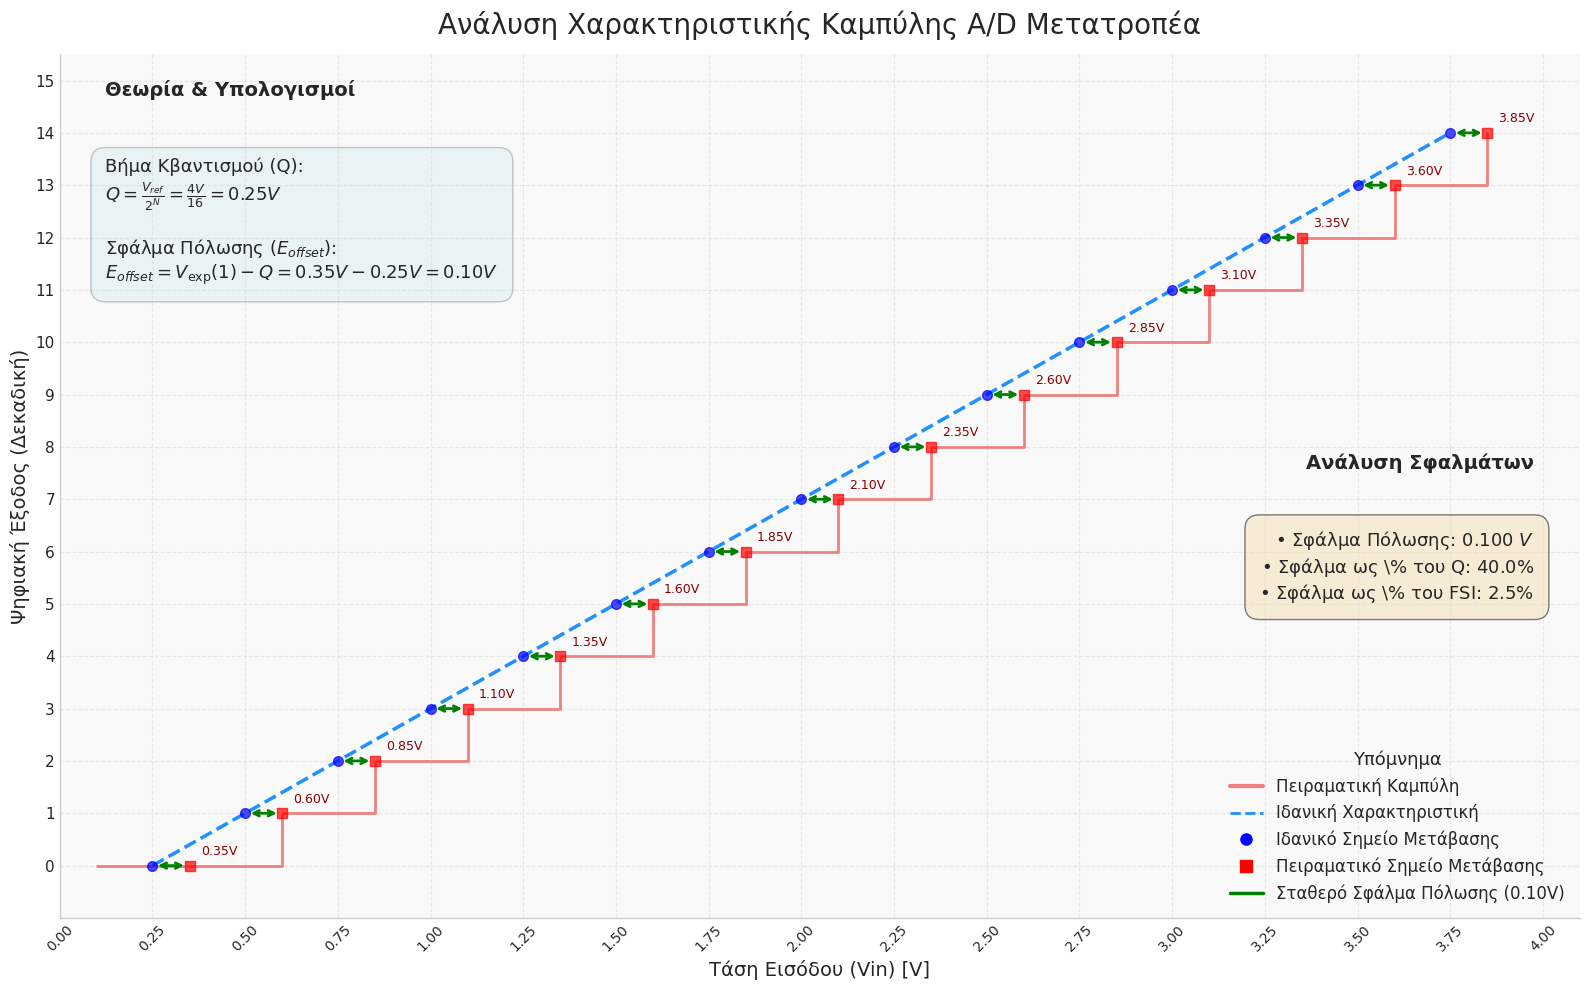

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# =============================================================================
# 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ
# =============================================================================
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
MEASURED_TRANSITION_V = np.array([
    0.35, 0.60, 0.85, 1.10, 1.35, 1.60, 1.85, 2.10,
    2.35, 2.60, 2.85, 3.10, 3.35, 3.60, 3.85
])
DIGITAL_CODES = np.arange(1, 16)

# Θεωρητικές τάσεις μετάβασης
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# Υπολογισμός Σφαλμάτων
OFFSET_ERROR_V = MEASURED_TRANSITION_V[0] - THEORETICAL_TRANSITION_V[0]
OFFSET_ERROR_PERCENT_Q = (OFFSET_ERROR_V / Q_STEP) * 100
OFFSET_ERROR_PERCENT_FSI = (OFFSET_ERROR_V / V_REF) * 100

# =============================================================================
# 2. ΡΥΘΜΙΣΕΙΣ ΓΡΑΦΗΜΑΤΟΣ (STYLING)
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'figure.figsize': (16, 10),
    'figure.facecolor': 'white',
    'axes.facecolor': '#f9f9f9',
    'axes.titlesize': 20,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 11,
    'legend.fontsize': 12,
    'figure.autolayout': True
})

# --- Βοηθητική Συνάρτηση για Καθαρότερο Κώδικα ---
def draw_transition_elements(ax, ideal_x, measured_x, y_level):
    """Σχεδιάζει τα σημεία, τα βέλη και τις ετικέτες για μία μετάβαση."""
    # Σχεδίαση σημείων (Ιδανικό 'o' και Πειραματικό 's')
    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)

    # Προσθήκη ετικέτας με την τιμή της τάσης
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')

    # Βέλος που δείχνει το σφάλμα
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="<->", color='green', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# =============================================================================
# 3. ΔΗΜΙΟΥΡΓΙΑ ΔΙΑΓΡΑΜΜΑΤΟΣ
# =============================================================================
fig, ax = plt.subplots()
ax.set_title('Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα', pad=15)

# --- Σχεδίαση Κύριων Γραμμών ---
# Πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.1], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
# Ιδανική γραμμή
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# --- Σχεδίαση Στοιχείων για Κάθε Σημείο ---
for i in range(len(DIGITAL_CODES)):
    draw_transition_elements(ax, THEORETICAL_TRANSITION_V[i], MEASURED_TRANSITION_V[i], DIGITAL_CODES[i] - 1)

# =============================================================================
# 4. ΠΡΟΣΘΗΚΗ ΠΛΗΡΟΦΟΡΙΑΚΩΝ ΠΛΑΙΣΙΩΝ
# =============================================================================
# --- Πλαίσιο Θεωρίας (ΠΑΝΩ ΑΡΙΣΤΕΡΑ) ---
ax.text(0.03, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$' '\n\n'
    r'Σφάλμα Πόλωσης ($E_{offset}$):' '\n'
    # ΔΙΟΡΘΩΣΗ: Χρήση \text{} για μη-μαθηματικό κείμενο
    r'$E_{offset} = V_{\text{exp}}(1) - Q = 0.35V - 0.25V = 0.10V$'
)
ax.text(0.03, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

# --- Πλαίσιο Αποτελεσμάτων & Υπομνήματος (ΚΑΤΩ ΔΕΞΙΑ) ---
legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='green', lw=2.5, label=f'Σταθερό Σφάλμα Πόλωσης ({OFFSET_ERROR_V:.2f}V)')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13',
                   loc='lower right', fontsize=12, facecolor='white', framealpha=0.6, shadow=True)

# Κείμενο αποτελεσμάτων (πάνω από το υπόμνημα)
results_text = (
    f'• Σφάλμα Πόλωσης: ${OFFSET_ERROR_V:.3f}\\ V$\n'
    f'• Σφάλμα ως \\% του Q: ${OFFSET_ERROR_PERCENT_Q:.1f}\\%$\n'
    f'• Σφάλμα ως \\% του FSI: ${OFFSET_ERROR_PERCENT_FSI:.1f}\\%$'
)
ax.text(0.97, 0.45, results_text, transform=ax.transAxes, fontsize=13,
        horizontalalignment='right', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))
ax.text(0.97, 0.52, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold', horizontalalignment='right')

# =============================================================================
# 5. ΤΕΛΙΚΕΣ ΡΥΘΜΙΣΕΙΣ & ΑΠΟΘΗΚΕΥΣΗ
# =============================================================================
ax.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)

# Αφαίρεση του πάνω και δεξιού περιγράμματος
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

# Αποθήκευση & Εμφάνιση
plt.savefig('professional_adc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

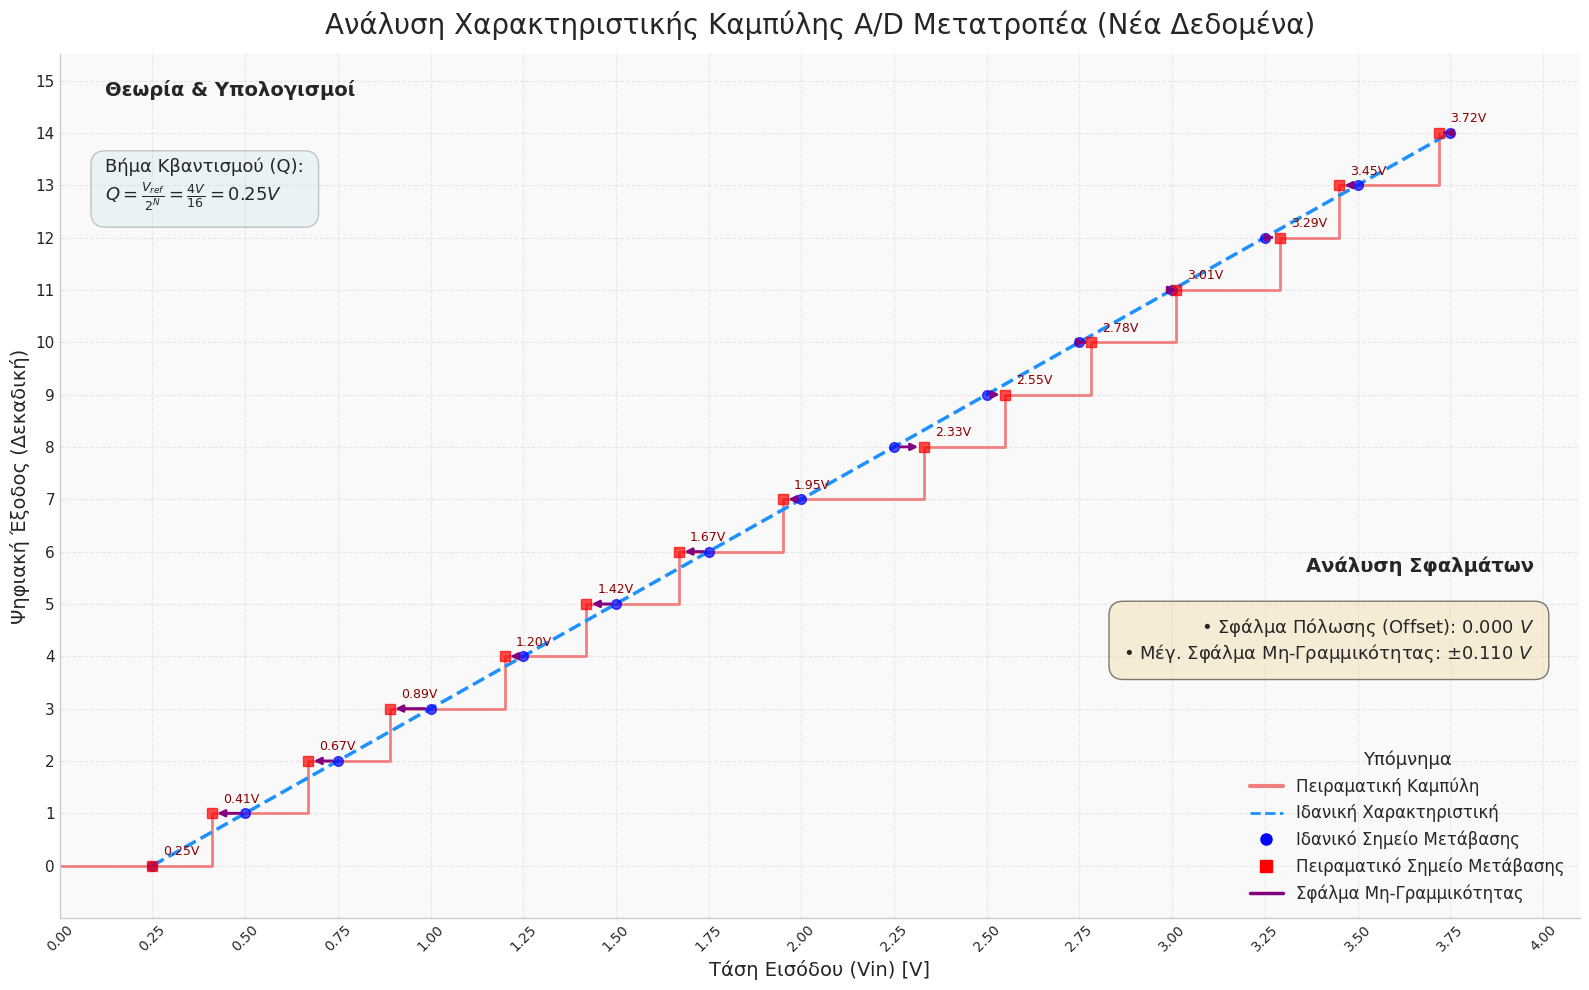

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΝΕΑ ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Νέες Πειραματικές μετρήσεις
MEASURED_TRANSITION_V = np.array([
    0.25, 0.41, 0.67, 0.89, 1.20, 1.42, 1.67, 1.95,
    2.33, 2.55, 2.78, 3.01, 3.29, 3.45, 3.72
])
DIGITAL_CODES = np.arange(1, 16)

# Θεωρητικές τάσεις μετάβασης
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# --- 2. ΝΕΟΙ ΥΠΟΛΟΓΙΣΜΟΙ ΣΦΑΛΜΑΤΩΝ ---
# Σφάλμα Πόλωσης (Offset Error)
OFFSET_ERROR_V = MEASURED_TRANSITION_V[0] - THEORETICAL_TRANSITION_V[0]

# Σφάλμα Μη-Γραμμικότητας (Non-Linearity Error)
# Είναι η μέγιστη απόκλιση από την ιδανική γραμμή, αφού διορθωθεί το offset
linearity_errors = (MEASURED_TRANSITION_V - OFFSET_ERROR_V) - THEORETICAL_TRANSITION_V
MAX_NON_LINEARITY_ERROR = np.max(np.abs(linearity_errors))

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans', 'figure.figsize': (16, 10), 'figure.facecolor': 'white',
    'axes.facecolor': '#f9f9f9', 'axes.titlesize': 20, 'axes.labelsize': 14,
    'xtick.labelsize': 10, 'ytick.labelsize': 11, 'legend.fontsize': 12, 'figure.autolayout': True
})

fig, ax = plt.subplots()
ax.set_title('Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα (Νέα Δεδομένα)', pad=15)

# --- Σχεδίαση Κύριων Γραμμών ---
ax.step(np.concatenate(([0.0], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# --- Οπτικοποίηση Σφαλμάτων ---
for i in range(len(DIGITAL_CODES)):
    ideal_x, measured_x = THEORETICAL_TRANSITION_V[i], MEASURED_TRANSITION_V[i]
    y_level = DIGITAL_CODES[i] - 1

    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    # Το βέλος τώρα δείχνει το σφάλμα μη-γραμμικότητας
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="-|>", color='purple', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# --- Πλαίσια Πληροφοριών ---
ax.text(0.03, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$'
)
ax.text(0.03, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='purple', lw=2.5, label=f'Σφάλμα Μη-Γραμμικότητας')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13',
                   loc='lower right', fontsize=12, facecolor='white', framealpha=0.6, shadow=True)

results_text = (
    f'• Σφάλμα Πόλωσης (Offset): ${OFFSET_ERROR_V:.3f}\\ V$\n'
    f'• Μέγ. Σφάλμα Μη-Γραμμικότητας: $\\pm {MAX_NON_LINEARITY_ERROR:.3f}\\ V$'
)
ax.text(0.97, 0.35, results_text, transform=ax.transAxes, fontsize=13,
        horizontalalignment='right', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))
ax.text(0.97, 0.40, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold', horizontalalignment='right')

# --- Τελικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

plt.savefig('final_adc_plot_new.png', dpi=300)
plt.show()

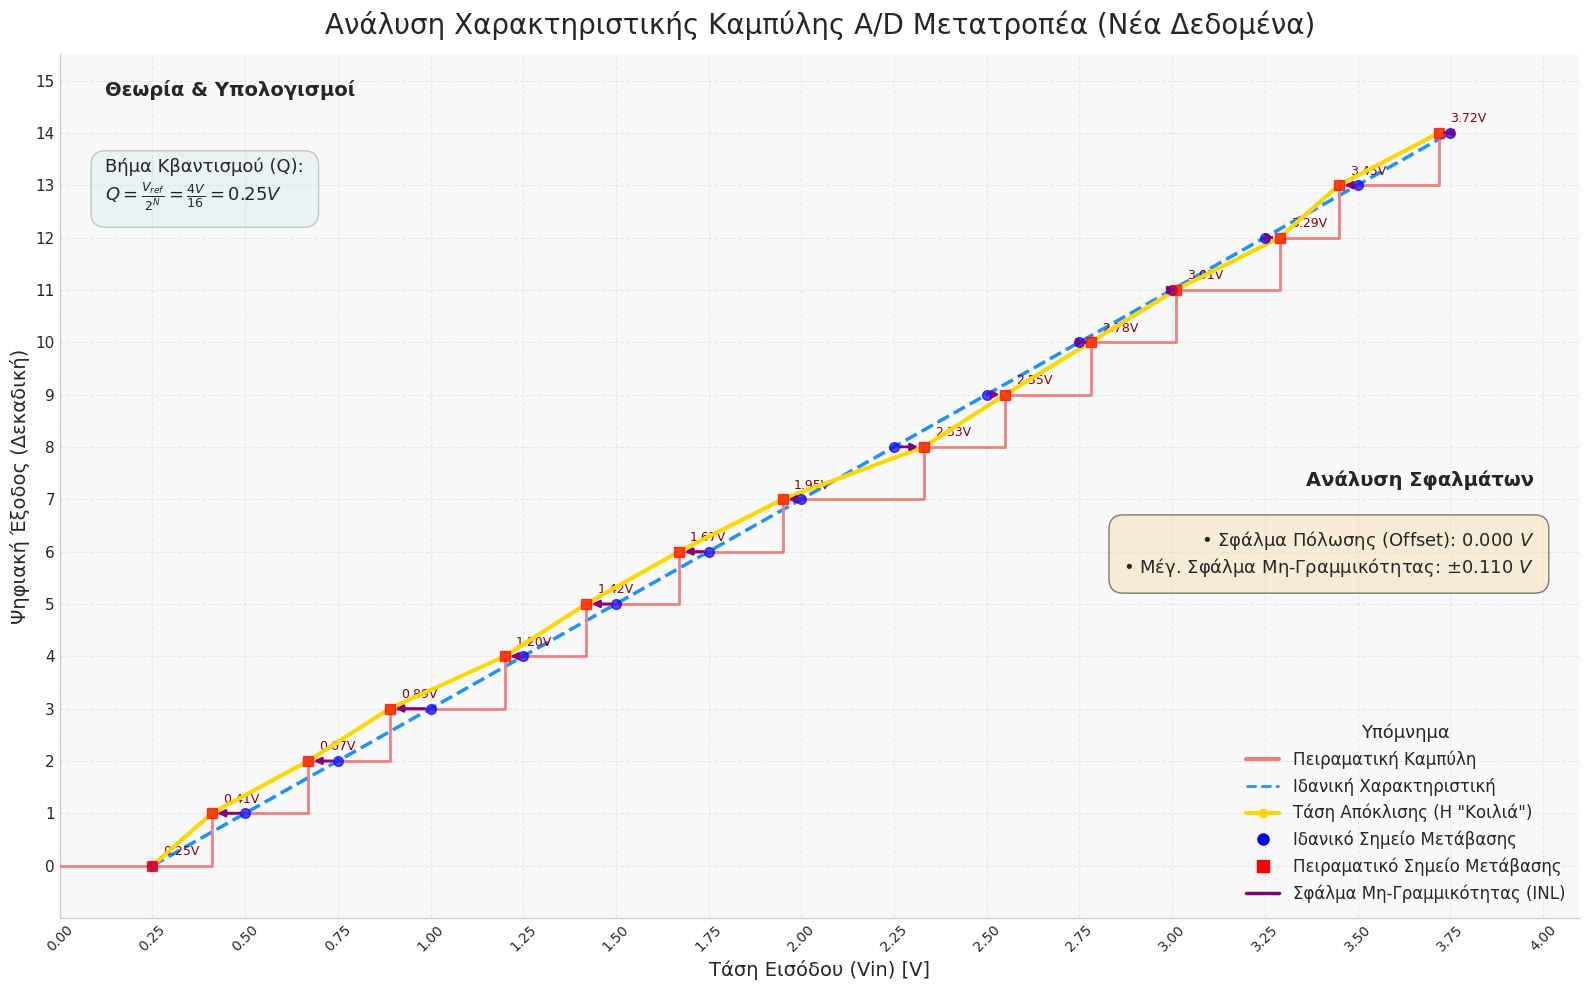

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΝΕΑ ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Νέες Πειραματικές μετρήσεις
MEASURED_TRANSITION_V = np.array([
    0.25, 0.41, 0.67, 0.89, 1.20, 1.42, 1.67, 1.95,
    2.33, 2.55, 2.78, 3.01, 3.29, 3.45, 3.72
])
DIGITAL_CODES = np.arange(1, 16)

# Θεωρητικές τάσεις μετάβασης
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# --- 2. ΝΕΟΙ ΥΠΟΛΟΓΙΣΜΟΙ ΣΦΑΛΜΑΤΩΝ ---
OFFSET_ERROR_V = MEASURED_TRANSITION_V[0] - THEORETICAL_TRANSITION_V[0]
linearity_errors = (MEASURED_TRANSITION_V - OFFSET_ERROR_V) - THEORETICAL_TRANSITION_V
MAX_NON_LINEARITY_ERROR = np.max(np.abs(linearity_errors))

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans', 'figure.figsize': (16, 10), 'figure.facecolor': 'white',
    'axes.facecolor': '#f9f9f9', 'axes.titlesize': 20, 'axes.labelsize': 14,
    'xtick.labelsize': 10, 'ytick.labelsize': 11, 'legend.fontsize': 12, 'figure.autolayout': True
})

fig, ax = plt.subplots()
ax.set_title('Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα (Νέα Δεδομένα)', pad=15)

# --- Σχεδίαση Κύριων Γραμμών ---
# Ιδανική γραμμή
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)
# Πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.0], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='lightcoral', lw=2, zorder=3)

# *** ΠΡΟΣΘΗΚΗ ΤΗΣ ΚΙΤΡΙΝΗΣ ΓΡΑΜΜΗΣ ("ΚΟΙΛΙΑ") ***
# Ενώνει τις γωνίες των σκαλοπατιών για να δείξει τη συνολική απόκλιση
ax.plot(MEASURED_TRANSITION_V, DIGITAL_CODES - 1, linestyle='-', marker='o', color='gold',
        lw=3, zorder=4, label='Τάση Απόκλισης (Η "Κοιλιά")')


# --- Οπτικοποίηση Σφαλμάτων ---
for i in range(len(DIGITAL_CODES)):
    ideal_x, measured_x = THEORETICAL_TRANSITION_V[i], MEASURED_TRANSITION_V[i]
    y_level = DIGITAL_CODES[i] - 1

    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=5, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=5, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="-|>", color='purple', lw=2, shrinkA=4, shrinkB=4), zorder=6)

# --- Πλαίσια Πληροφοριών ---
ax.text(0.03, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$'
)
ax.text(0.03, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    # Νέο στοιχείο για το υπόμνημα
    Line2D([0], [0], linestyle='-', marker='o', color='gold', lw=3, label='Τάση Απόκλισης (Η "Κοιλιά")'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='purple', lw=2.5, label=f'Σφάλμα Μη-Γραμμικότητας (INL)')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13',
                   loc='lower right', fontsize=12, facecolor='white', framealpha=0.6, shadow=True)

results_text = (
    f'• Σφάλμα Πόλωσης (Offset): ${OFFSET_ERROR_V:.3f}\\ V$\n'
    f'• Μέγ. Σφάλμα Μη-Γραμμικότητας: $\\pm {MAX_NON_LINEARITY_ERROR:.3f}\\ V$'
)
ax.text(0.97, 0.45, results_text, transform=ax.transAxes, fontsize=13, # Adjusted y-position
        horizontalalignment='right', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))
ax.text(0.97, 0.50, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold', horizontalalignment='right')

# --- Τελικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

plt.savefig('final_adc_plot_with_belly.png', dpi=300)
plt.show()

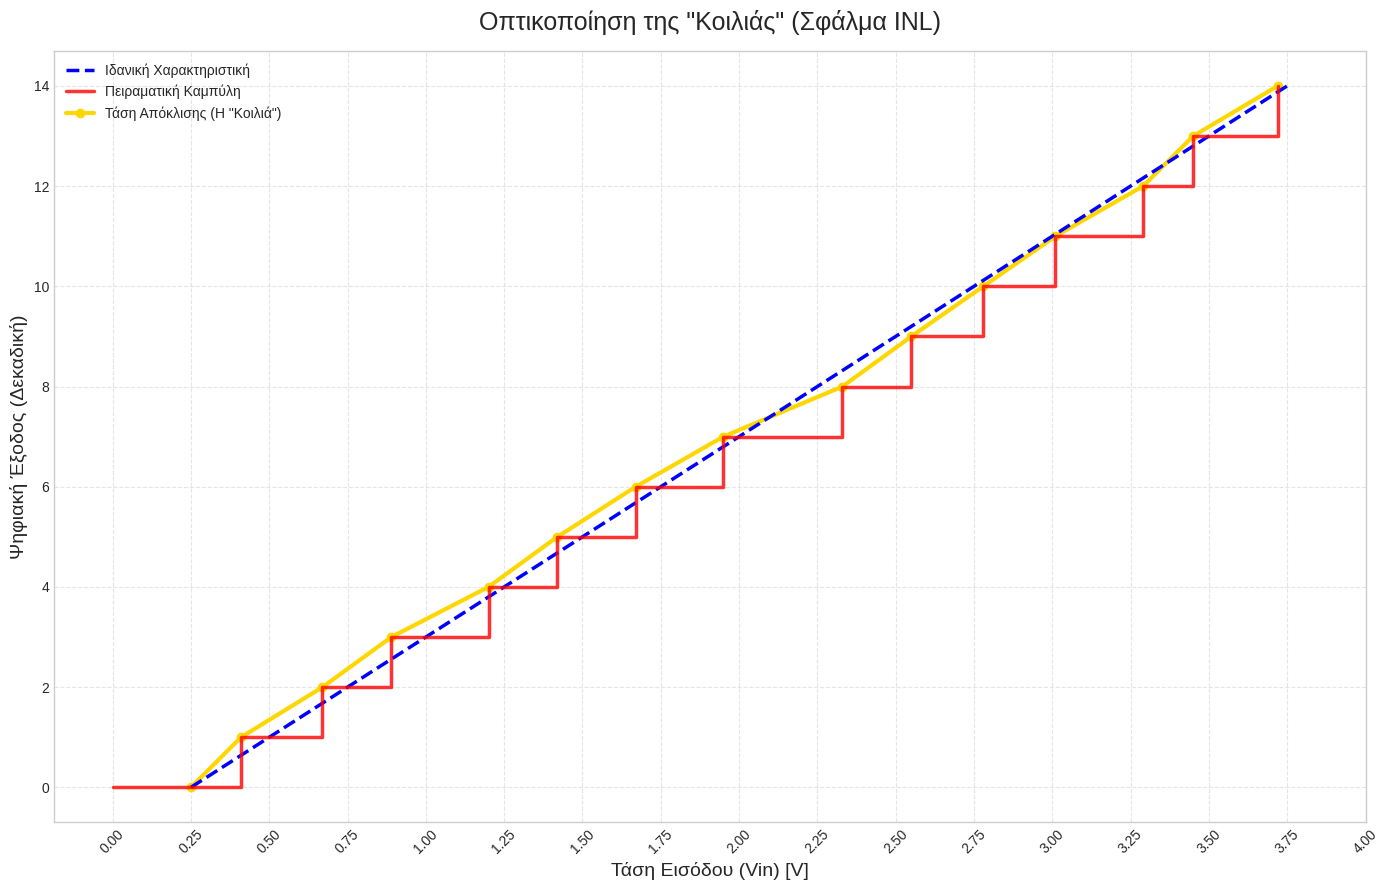

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

MEASURED_TRANSITION_V = np.array([
    0.25, 0.41, 0.67, 0.89, 1.20, 1.42, 1.67, 1.95,
    2.33, 2.55, 2.78, 3.01, 3.29, 3.45, 3.72
])
DIGITAL_CODES = np.arange(1, 16)
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# --- 2. ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# --- ΣΧΕΔΙΑΣΗ ΣΤΟΙΧΕΙΩΝ ---
# 1. Η Ιδανική Μπλε Γραμμή
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='blue', lw=2.5, zorder=2, label='Ιδανική Χαρακτηριστική')

# 2. Τα Κόκκινα Πειραματικά Σκαλοπάτια
ax.step(np.concatenate(([0.0], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='red', lw=2.5, zorder=3, alpha=0.8, label='Πειραματική Καμπύλη')

# 3. Η ΚΙΤΡΙΝΗ ΓΡΑΜΜΗ ΠΟΥ ΔΕΙΧΝΕΙ ΤΗΝ "ΚΟΙΛΙΑ" (INL TREND)
# Ενώνει τις γωνίες των σκαλοπατιών για να δείξει τη συνολική απόκλιση
ax.plot(MEASURED_TRANSITION_V, DIGITAL_CODES - 1, linestyle='-', marker='o', color='gold', lw=3, zorder=1, label='Τάση Απόκλισης (Η "Κοιλιά")')

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Οπτικοποίηση της "Κοιλιάς" (Σφάλμα INL)', fontsize=18, pad=15)
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\p'
<>:57: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-85751079.py:57: SyntaxWarning: invalid escape sequence '\p'
  f'• Μέγιστο INL: $\\mathbf{{\pm {MAX_INL_ERROR:.3f}\\ V}}$'


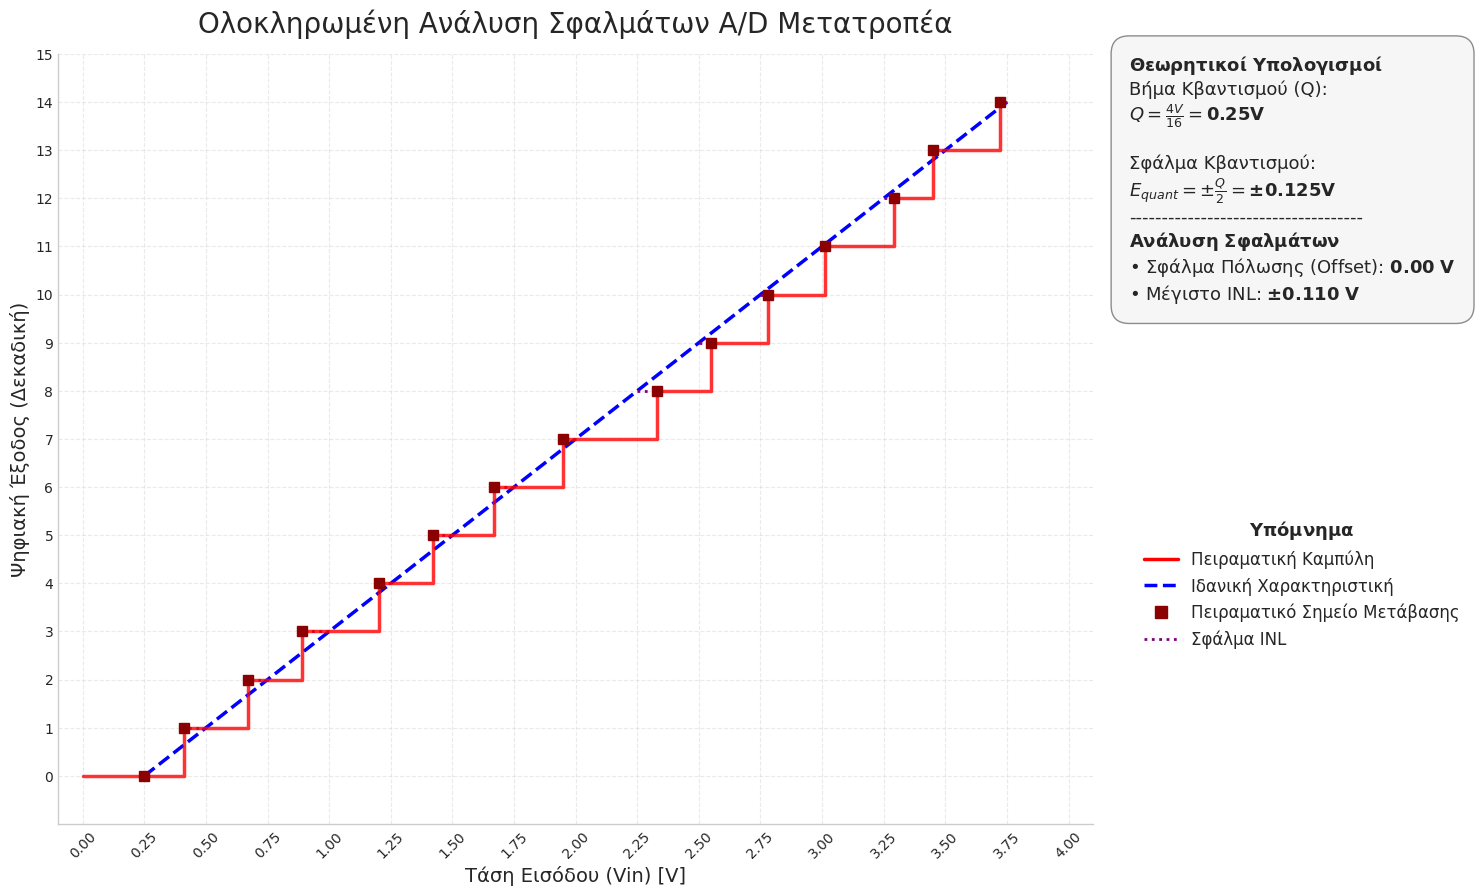

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

MEASURED_TRANSITION_V = np.array([
    0.25, 0.41, 0.67, 0.89, 1.20, 1.42, 1.67, 1.95,
    2.33, 2.55, 2.78, 3.01, 3.29, 3.45, 3.72
])
DIGITAL_CODES = np.arange(1, 16)
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# --- 2. ΥΠΟΛΟΓΙΣΜΟΙ ΣΦΑΛΜΑΤΩΝ ---
OFFSET_ERROR_V = MEASURED_TRANSITION_V[0] - THEORETICAL_TRANSITION_V[0]
INL_errors = MEASURED_TRANSITION_V - THEORETICAL_TRANSITION_V
MAX_INL_ERROR = np.max(np.abs(INL_errors))

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ "DASHBOARD" PLOT ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.family': 'DejaVu Sans', 'figure.facecolor': 'white'})
fig, ax = plt.subplots(figsize=(18, 10))
fig.subplots_adjust(right=0.7) # Δημιουργία χώρου για το πάνελ πληροφοριών

# --- Σχεδίαση Στοιχείων Γραφήματος ---
ax.set_title('Ολοκληρωμένη Ανάλυση Σφαλμάτων A/D Μετατροπέα', fontsize=20, pad=15)

# Ιδανική γραμμή
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='blue', lw=2.5, zorder=2)

# Πειραματικά σκαλοπάτια
ax.step(np.concatenate(([0.0], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='red', lw=2.5, zorder=3, alpha=0.8)

# Οπτικοποίηση INL
for i in range(len(DIGITAL_CODES)):
    ideal_x, measured_x = THEORETICAL_TRANSITION_V[i], MEASURED_TRANSITION_V[i]
    y_level = DIGITAL_CODES[i] - 1

    # Πειραματικό σημείο
    ax.plot(measured_x, y_level, 's', color='darkred', markersize=7, zorder=4)
    # Γραμμή που δείχνει το INL
    ax.plot([ideal_x, measured_x], [y_level, y_level], linestyle=':', color='purple', lw=2)

# --- Πάνελ Πληροφοριών στα Δεξιά ---
info_text = (
    r'$\bf{Θεωρητικοί\ Υπολογισμοί}$' '\n'
    r'Βήμα Κβαντισμού (Q):' '\n' r'$Q = \frac{4V}{16} = \mathbf{0.25V}$' '\n\n'
    r'Σφάλμα Κβαντισμού:' '\n' r'$E_{quant} = \pm \frac{Q}{2} = \mathbf{\pm 0.125V}$' '\n'
    r'------------------------------------' '\n'
    r'$\bf{Ανάλυση\ Σφαλμάτων}$' '\n'
    f'• Σφάλμα Πόλωσης (Offset): $\\mathbf{{{OFFSET_ERROR_V:.2f}\\ V}}$\n'
    f'• Μέγιστο INL: $\\mathbf{{\pm {MAX_INL_ERROR:.3f}\\ V}}$'
)
fig.text(0.72, 0.88, info_text, ha='left', va='top', fontsize=13,
         bbox=dict(boxstyle='round,pad=1', facecolor='whitesmoke', alpha=0.9, edgecolor='grey'))

# Υπόμνημα
legend_elements = [
    Line2D([0], [0], color='red', lw=2.5, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='blue', lw=2.5, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='s', color='darkred', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], linestyle=':', color='purple', lw=2, label='Σφάλμα INL')
]
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.72, 0.35),
           fontsize=12, title=r'$\bf{Υπόμνημα}$', title_fontsize='13', frameon=False)

# --- Τελικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]', fontsize=14)
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)', fontsize=14)
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.set_xlim(-0.1, V_REF + 0.1)
ax.set_ylim(-1, 15)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

plt.savefig('final_adc_plot_with_inl.png', dpi=300, bbox_inches='tight')
plt.show()

<>:58: SyntaxWarning: invalid escape sequence '\D'
<>:58: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2450970005.py:58: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('Διαφορά Θερμοκρασίας $(\Delta\theta)$ [°C]')


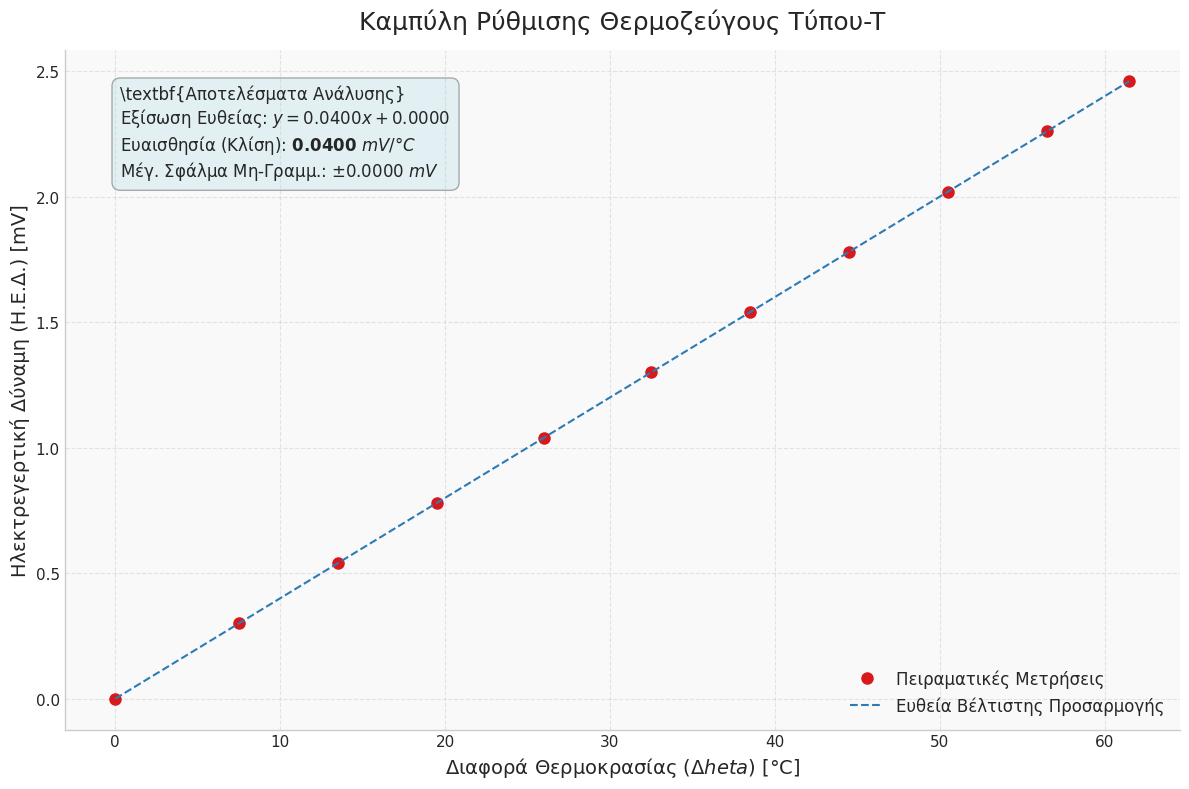

Πειραματική Κλίση (Ευαισθησία): 0.0400 mV/°C
Μέγιστο Σφάλμα Μη-Γραμμικότητας: 0.0000 mV


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ ---

# ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΑΠΟ ΤΗ ΣΤΗΛΗ "ΔΙΑΦΟΡΑ ΘΕΡΜ/ΣΙΑΣ (Δθ)" ΤΟΥ ΠΙΝΑΚΑ ΣΑΣ <==
delta_theta = np.array([
    0, 7.5, 13.5, 19.5, 26.0, 32.5, 38.5, 44.5, 50.5, 56.5, 61.5
])

# ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΑΠΟ ΤΗ ΣΤΗΛΗ "Η.Ε.Δ. (mV)" ΤΟΥ ΠΙΝΑΚΑ ΣΑΣ <==
emf_mv = np.array([
    0, 0.3, 0.54, 0.78, 1.04, 1.30, 1.54, 1.78, 2.02, 2.26, 2.46
])


# --- 2. ΥΠΟΛΟΓΙΣΜΟΙ & ΓΡΑΜΜΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ ---
# Εύρεση της ευθείας βέλτιστης προσαρμογής (linear regression)
# polyfit επιστρέφει την κλίση (m) και το σημείο τομής με τον y-άξονα (b)
slope, intercept = np.polyfit(delta_theta, emf_mv, 1)

# Δημιουργία της γραμμής παλινδρόμησης για σχεδίαση
regression_line = slope * delta_theta + intercept

# Υπολογισμός Σφάλματος Μη-Γραμμικότητας
# Είναι η μέγιστη απόλυτη απόκλιση των μετρήσεων από την ευθεία βέλτιστης προσαρμογής
non_linearity_error = np.max(np.abs(emf_mv - regression_line))

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΕΠΑΓΓΕΛΜΑΤΙΚΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans', 'figure.figsize': (12, 8), 'figure.facecolor': 'white',
    'axes.facecolor': '#f9f9f9', 'axes.titlesize': 18, 'axes.labelsize': 14,
    'xtick.labelsize': 11, 'ytick.labelsize': 11, 'legend.fontsize': 12
})

fig, ax = plt.subplots()

# Σχεδίαση των πειραματικών σημείων
ax.plot(delta_theta, emf_mv, 'o', color='#d7191c', markersize=8, label='Πειραματικές Μετρήσεις')

# Σχεδίαση της ευθείας βέλτιστης προσαρμογής
ax.plot(delta_theta, regression_line, linestyle='--', color='#2c7bb6', label='Ευθεία Βέλτιστης Προσαρμογής')

# --- Επισημάνσεις (Annotations) ---
# Πλαίσιο πληροφοριών με τα αποτελέσματα
info_text = (
    r'\textbf{Αποτελέσματα Ανάλυσης}' '\n'
    f'Εξίσωση Ευθείας: $y = {slope:.4f}x {intercept:+.4f}$\n'
    f'Ευαισθησία (Κλίση): $\\mathbf{{{slope:.4f}}}\\ mV/°C$\n'
    f'Μέγ. Σφάλμα Μη-Γραμμ.: $\\pm {non_linearity_error:.4f}\\ mV$'
)
ax.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3))

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Καμπύλη Ρύθμισης Θερμοζεύγους Τύπου-T', pad=15)
ax.set_xlabel('Διαφορά Θερμοκρασίας $(\Delta\theta)$ [°C]')
ax.set_ylabel('Ηλεκτρεγερτική Δύναμη (Η.Ε.Δ.) [mV]')
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig('thermocouple_plot.png', dpi=300)
plt.show()

# Εκτύπωση αποτελεσμάτων για να τα περάσετε στην αναφορά
print(f"Πειραματική Κλίση (Ευαισθησία): {slope:.4f} mV/°C")
print(f"Μέγιστο Σφάλμα Μη-Γραμμικότητας: {non_linearity_error:.4f} mV")

Η γραφική παράσταση 'thermistor_self_heating.png' αποθηκεύτηκε.
Η γραφική παράσταση 'thermistor_calibration.png' αποθηκεύτηκε.


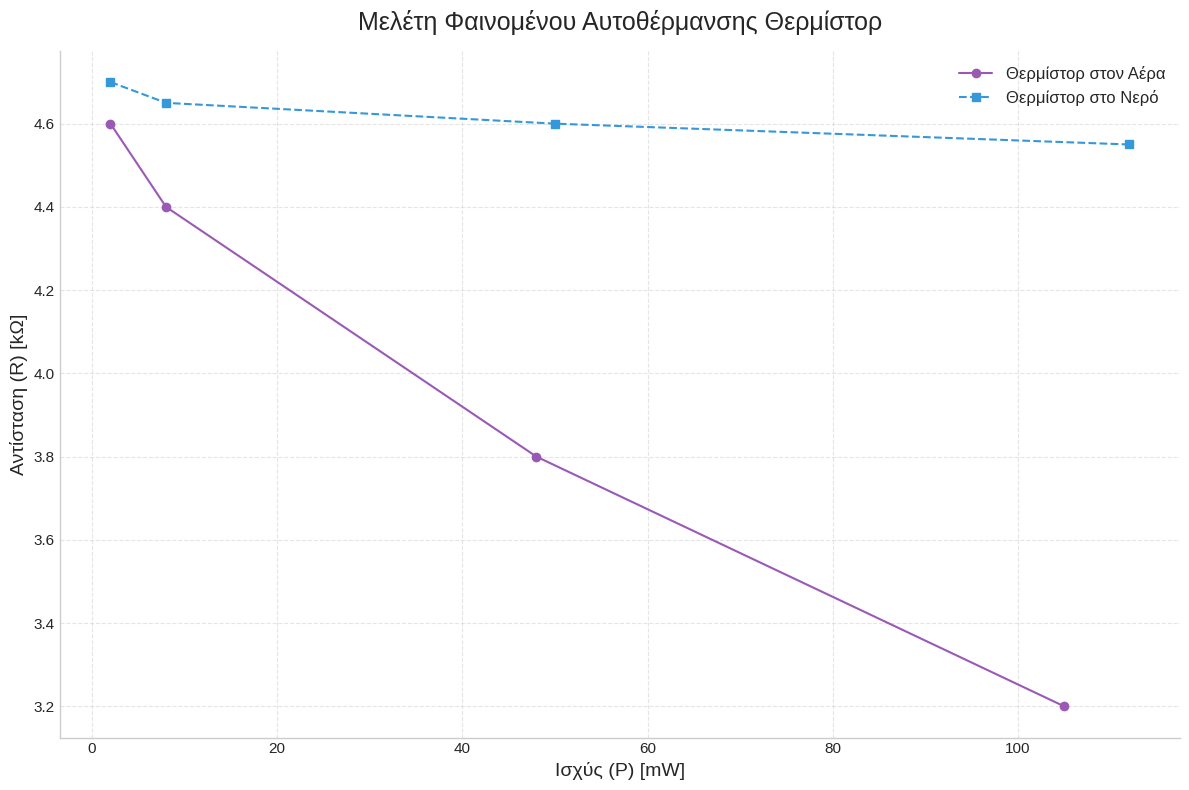

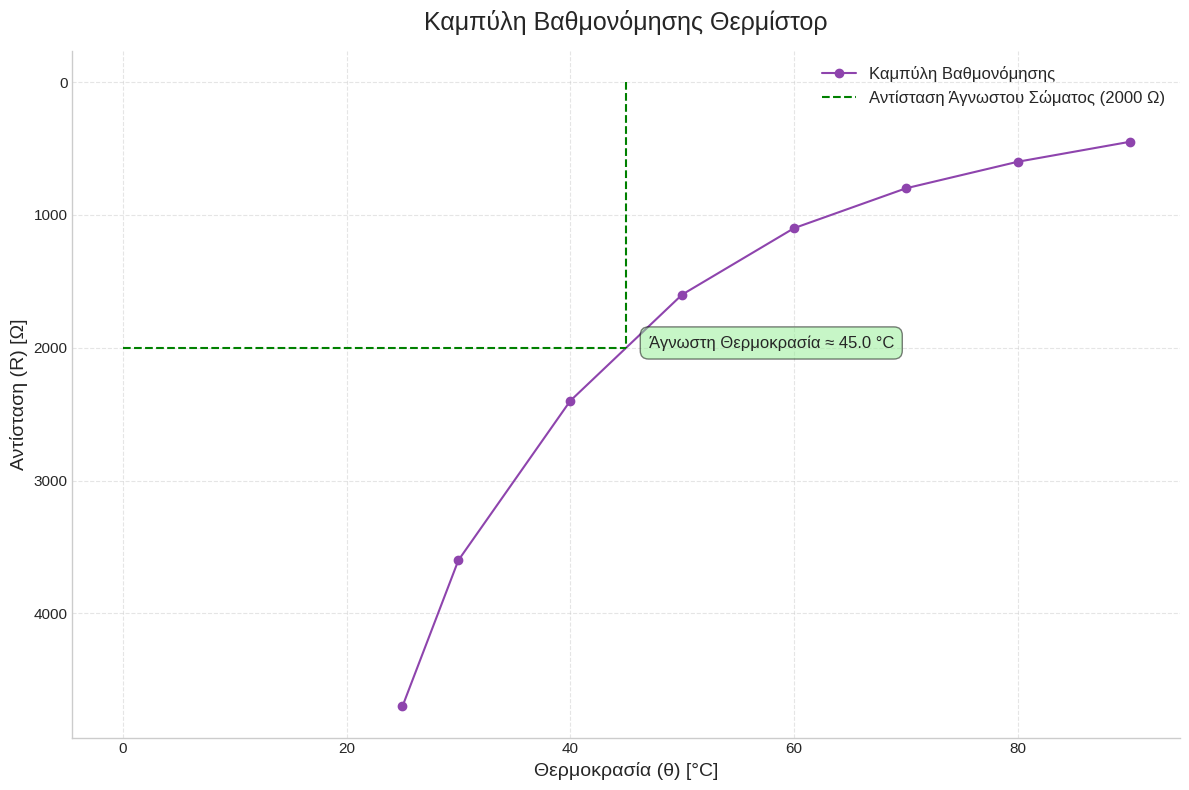

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# --- ΓΡΑΦΙΚΗ ΠΑΡΑΣΤΑΣΗ 1: ΜΕΛΕΤΗ ΑΥΤΟΘΕΡΜΑΝΣΗΣ ---
# =============================================================================

def plot_self_heating():
    """Δημιουργεί τη γραφική παράσταση R = f(P) για το φαινόμενο αυτοθέρμανσης."""

    # --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ (ΠΙΝΑΚΑΣ 1) ---

    # ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΓΙΑ ΙΣΧΥ (P) ΚΑΙ ΑΝΤΙΣΤΑΣΗ (R) ΜΕ ΤΟ ΘΕΡΜΙΣΤΟΡ ΣΤΟΝ ΑΕΡΑ <==
    power_air = np.array([2.0, 8.0, 48.0, 105.0]) # Παράδειγμα τιμών σε mW
    resistance_air = np.array([4.6, 4.4, 3.8, 3.2]) # Παράδειγμα τιμών σε kΩ

    # ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΓΙΑ ΙΣΧΥ (P) ΚΑΙ ΑΝΤΙΣΤΑΣΗ (R) ΜΕ ΤΟ ΘΕΡΜΙΣΤΟΡ ΣΤΟ ΝΕΡΟ <==
    power_water = np.array([2.0, 8.0, 50.0, 112.0]) # Παράδειγμα τιμών σε mW
    resistance_water = np.array([4.7, 4.65, 4.6, 4.55]) # Παράδειγμα τιμών σε kΩ

    # --- 2. ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = (12, 8)

    fig, ax = plt.subplots()

    ax.plot(power_air, resistance_air, marker='o', linestyle='-', color='#9b59b6', label='Θερμίστορ στον Αέρα')
    ax.plot(power_water, resistance_water, marker='s', linestyle='--', color='#3498db', label='Θερμίστορ στο Νερό')

    # --- 3. ΡΥΘΜΙΣΕΙΣ & ΑΠΟΘΗΚΕΥΣΗ ---
    ax.set_title('Μελέτη Φαινομένου Αυτοθέρμανσης Θερμίστορ', fontsize=18, pad=15)
    ax.set_xlabel('Ισχύς (P) [mW]', fontsize=14)
    ax.set_ylabel('Αντίσταση (R) [kΩ]', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.savefig('thermistor_self_heating.png', dpi=300)
    print("Η γραφική παράσταση 'thermistor_self_heating.png' αποθηκεύτηκε.")

# =============================================================================
# --- ΓΡΑΦΙΚΗ ΠΑΡΑΣΤΑΣΗ 2: ΚΑΜΠΥΛΗ ΒΑΘΜΟΝΟΜΗΣΗΣ ---
# =============================================================================

def plot_calibration_curve():
    """Δημιουργεί την καμπύλη βαθμονόμησης R = f(θ) για την εύρεση άγνωστης θερμοκρασίας."""

    # --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ (ΠΙΝΑΚΑΣ 2) ---

    # ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΘΕΡΜΟΚΡΑΣΙΑΣ (θ) ΑΠΟ ΤΗ ΒΑΘΜΟΝΟΜΗΣΗ <==
    temperature = np.array([25, 30, 40, 50, 60, 70, 80, 90]) # Παράδειγμα τιμών σε °C

    # ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΑΝΤΙΣΤΟΙΧΕΣ ΤΙΜΕΣ ΑΝΤΙΣΤΑΣΗΣ (R) <==
    resistance = np.array([4700, 3600, 2400, 1600, 1100, 800, 600, 450]) # Παράδειγμα τιμών σε Ω

    # ==> ΒΑΛΤΕ ΕΔΩ ΤΗΝ ΤΙΜΗ ΤΗΣ ΑΝΤΙΣΤΑΣΗΣ ΠΟΥ ΜΕΤΡΗΣΑΤΕ ΓΙΑ ΤΟ ΑΓΝΩΣΤΟ ΣΩΜΑ <==
    unknown_resistance = 2000 # Παράδειγμα τιμής σε Ω

    # --- 2. ΥΠΟΛΟΓΙΣΜΟΣ ΑΓΝΩΣΤΗΣ ΘΕΡΜΟΚΡΑΣΙΑΣ (ΜΕ ΠΑΡΕΜΒΟΛΗ) ---
    # Χρησιμοποιούμε γραμμική παρεμβολή για να βρούμε την άγνωστη θερμοκρασία
    unknown_temperature = np.interp(unknown_resistance, resistance[::-1], temperature[::-1])

    # --- 3. ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = (12, 8)

    fig, ax = plt.subplots()

    ax.plot(temperature, resistance, marker='o', linestyle='-', color='#8e44ad', label='Καμπύλη Βαθμονόμησης')

    # --- 4. ΕΠΙΣΗΜΑΝΣΕΙΣ (ANNOTATIONS) ---
    ax.hlines(y=unknown_resistance, xmin=0, xmax=unknown_temperature, color='green', linestyle='--', label=f'Αντίσταση Άγνωστου Σώματος ({unknown_resistance} Ω)')
    ax.vlines(x=unknown_temperature, ymin=0, ymax=unknown_resistance, color='green', linestyle='--')

    result_text = f'Άγνωστη Θερμοκρασία ≈ {unknown_temperature:.1f} °C'
    ax.text(unknown_temperature + 2, unknown_resistance, result_text, fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5))

    # --- 5. ΡΥΘΜΙΣΕΙΣ & ΑΠΟΘΗΚΕΥΣΗ ---
    ax.set_title('Καμπύλη Βαθμονόμησης Θερμίστορ', fontsize=18, pad=15)
    ax.set_xlabel('Θερμοκρασία (θ) [°C]', fontsize=14)
    ax.set_ylabel('Αντίσταση (R) [Ω]', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    ax.spines[['top', 'right']].set_visible(False)
    # Αντιστροφή του άξονα y για τυπική απεικόνιση καμπύλης θερμίστορ
    ax.invert_yaxis()

    plt.tight_layout()
    plt.savefig('thermistor_calibration.png', dpi=300)
    print("Η γραφική παράσταση 'thermistor_calibration.png' αποθηκεύτηκε.")


# =============================================================================
# --- ΕΚΤΕΛΕΣΗ ---
# =============================================================================
if __name__ == '__main__':
    plot_self_heating()
    plot_calibration_curve()
    plt.show() # Εμφανίζει και τα δύο γραφήματα στο τέλος

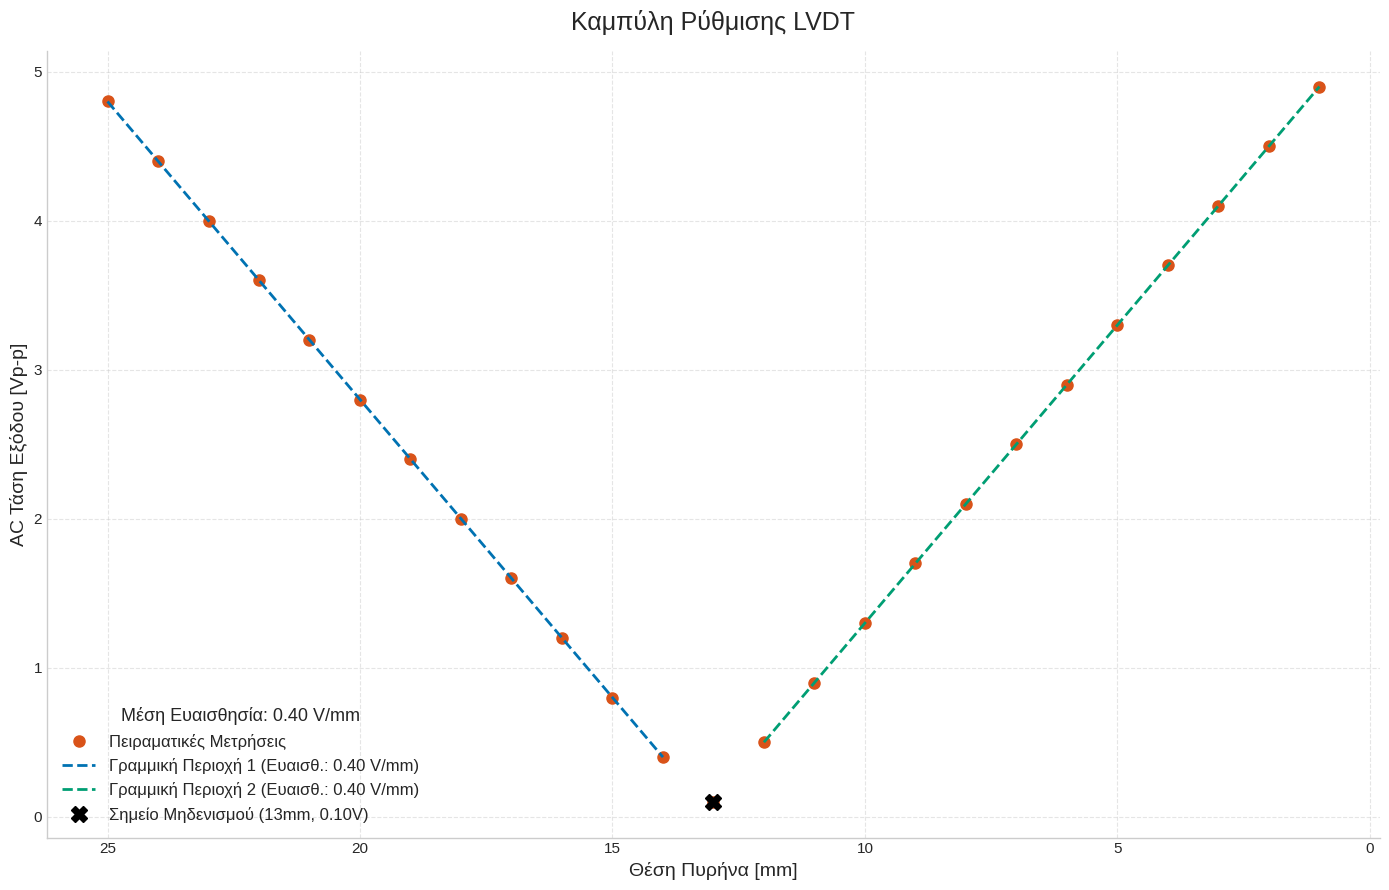

Μέση Ευαισθησία: 0.400 V/mm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ (ΠΙΝΑΚΑΣ 1) ---

# Ο άξονας x είναι η θέση του πυρήνα σε mm
position_mm = np.arange(25, 0, -1)

# ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ 25 ΤΙΜΕΣ ΑΠΟ ΤΗ ΣΤΗΛΗ "AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)" ΤΟΥ ΠΙΝΑΚΑ ΣΑΣ <==
# Οι παρακάτω τιμές είναι ένα ΡΕΑΛΙΣΤΙΚΟ ΠΑΡΑΔΕΙΓΜΑ. Αντικαταστήστε τες με τις δικές σας.
voltage_vpp = np.array([
    4.8, 4.4, 4.0, 3.6, 3.2, 2.8, 2.4, 2.0, 1.6, 1.2, # 25mm -> 16mm
    0.8, 0.4, 0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9, # 15mm ->  6mm
    3.3, 3.7, 4.1, 4.5, 4.9                             #  5mm ->  1mm
])


# --- 2. ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ LVDT ---

# Εύρεση του σημείου μηδενισμού (null point)
null_index = np.argmin(voltage_vpp)
null_position = position_mm[null_index]
null_voltage = voltage_vpp[null_index]

# Διαχωρισμός δεδομένων στις δύο γραμμικές περιοχές (αριστερά και δεξιά του null)
left_positions = position_mm[:null_index]
left_voltages = voltage_vpp[:null_index]

right_positions = position_mm[null_index+1:]
right_voltages = voltage_vpp[null_index+1:]

# Γραμμική παλινδρόμηση για κάθε περιοχή
slope_left, intercept_left = np.polyfit(left_positions, left_voltages, 1)
regression_left = slope_left * left_positions + intercept_left

slope_right, intercept_right = np.polyfit(right_positions, right_voltages, 1)
regression_right = slope_right * right_positions + intercept_right

# Η ευαισθησία είναι η απόλυτη τιμή της κλίσης
sensitivity_left = abs(slope_left)
sensitivity_right = abs(slope_right)
average_sensitivity = (sensitivity_left + sensitivity_right) / 2


# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΕΠΑΓΓΕΛΜΑΤΙΚΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 9)
fig, ax = plt.subplots()

# Σχεδίαση πειραματικών σημείων
ax.plot(position_mm, voltage_vpp, 'o', color='#D95319', markersize=8, label='Πειραματικές Μετρήσεις')

# Σχεδίαση γραμμών παλινδρόμησης
ax.plot(left_positions, regression_left, '--', color='#0072B2', lw=2, label=f'Γραμμική Περιοχή 1 (Ευαισθ.: {sensitivity_left:.2f} V/mm)')
ax.plot(right_positions, regression_right, '--', color='#009E73', lw=2, label=f'Γραμμική Περιοχή 2 (Ευαισθ.: {sensitivity_right:.2f} V/mm)')

# Σημείο μηδενισμού
ax.plot(null_position, null_voltage, 'X', color='black', markersize=12, label=f'Σημείο Μηδενισμού ({null_position}mm, {null_voltage:.2f}V)')

# --- Ρυθμίσεις & Αποθήκευση ---
ax.set_title('Καμπύλη Ρύθμισης LVDT', fontsize=18, pad=15)
ax.set_xlabel('Θέση Πυρήνα [mm]', fontsize=14)
ax.set_ylabel('AC Τάση Εξόδου [Vp-p]', fontsize=14)
ax.legend(fontsize=12, title=f'Μέση Ευαισθησία: {average_sensitivity:.2f} V/mm', title_fontsize='13')
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
# Αντιστροφή του άξονα x για να ταιριάζει με τη σειρά των μετρήσεων
ax.invert_xaxis()

plt.tight_layout()
plt.savefig('lvdt_plot.png', dpi=300)
plt.show()

# Εκτύπωση αποτελεσμάτων για να τα περάσετε στην αναφορά
print(f"Μέση Ευαισθησία: {average_sensitivity:.3f} V/mm")

<>:46: SyntaxWarning: invalid escape sequence '\%'
<>:46: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipython-input-1074179603.py:46: SyntaxWarning: invalid escape sequence '\%'
  f'Μέγ. Σφάλμα ως \% FSO: $\\mathbf{{{max_hysteresis_error_percent:.2f}}}\\%$'


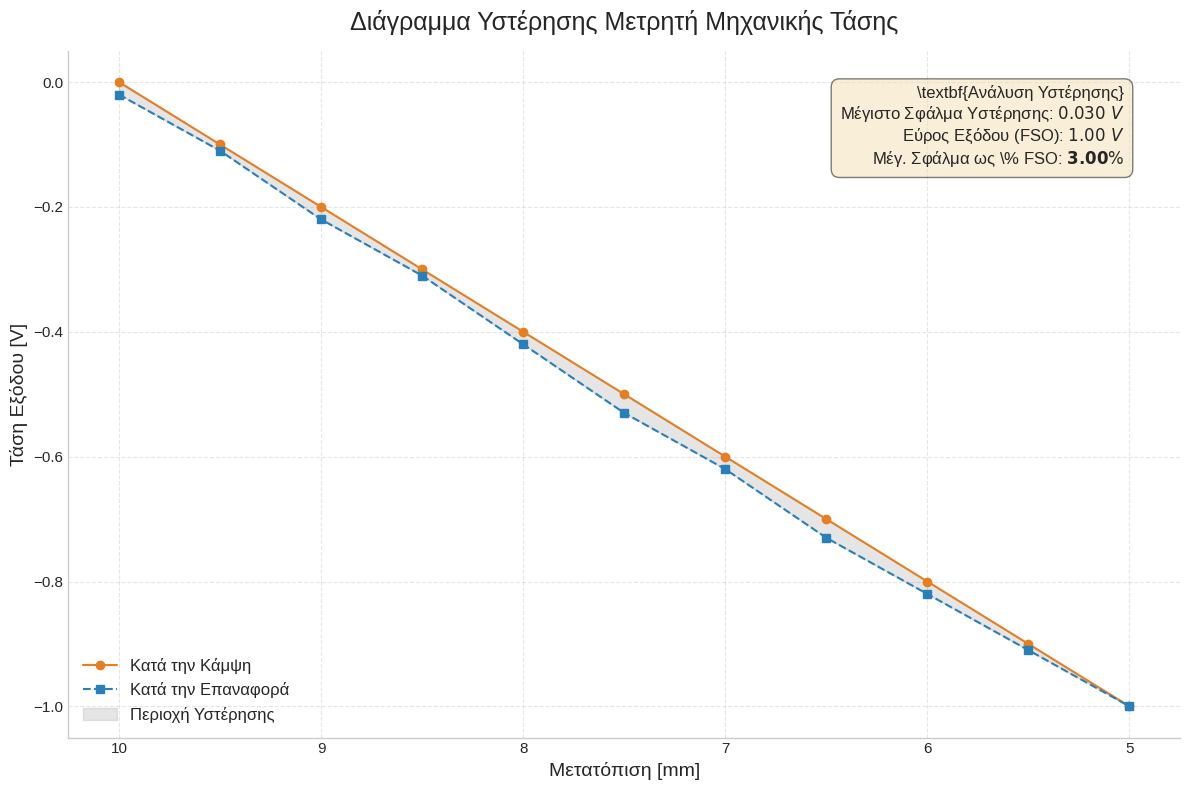

Μέγιστο Σφάλμα Υστέρησης: 0.0300 V
Μέγιστο Σφάλμα Υστέρησης ως % FSO: 3.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ (ΠΙΝΑΚΑΣ 5.2) ---

# Ο άξονας x είναι η μετατόπιση του ελάσματος σε mm
displacement_mm = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5])

# ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΤΑΣΗΣ "ΚΑΤΑ ΤΗΝ ΚΑΜΨΗ" <==
# Οι παρακάτω τιμές είναι ένα ΡΕΑΛΙΣΤΙΚΟ ΠΑΡΑΔΕΙΓΜΑ.
voltage_bending = np.array([0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0])

# ==> ΒΑΛΤΕ ΕΔΩ ΤΙΣ ΤΙΜΕΣ ΤΑΣΗΣ "ΚΑΤΑ ΤΗΝ ΕΠΑΝΑΦΟΡΑ" <==
# Σημειώστε ότι οι τιμές είναι ελαφρώς διαφορετικές για να φανεί η υστέρηση.
voltage_returning = np.array([-0.02, -0.11, -0.22, -0.31, -0.42, -0.53, -0.62, -0.73, -0.82, -0.91, -1.0])


# --- 2. ΥΠΟΛΟΓΙΣΜΟΣ ΣΦΑΛΜΑΤΟΣ ΥΣΤΕΡΗΣΗΣ ---
# Εύρεση της μέγιστης διαφοράς μεταξύ κάμψης και επαναφοράς
hysteresis_error_abs = np.abs(voltage_bending - voltage_returning)
max_hysteresis_error_v = np.max(hysteresis_error_abs)

# Εύρος εξόδου (Full Scale Output - FSO)
fso = np.max(voltage_bending) - np.min(voltage_bending)

# Μέγιστο σφάλμα υστέρησης ως ποσοστό του FSO
max_hysteresis_error_percent = (max_hysteresis_error_v / fso) * 100 if fso != 0 else 0

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΕΠΑΓΓΕΛΜΑΤΙΚΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()

# Σχεδίαση των δύο καμπυλών
ax.plot(displacement_mm, voltage_bending, marker='o', linestyle='-', color='#e67e22', label='Κατά την Κάμψη')
ax.plot(displacement_mm, voltage_returning, marker='s', linestyle='--', color='#2980b9', label='Κατά την Επαναφορά')

# Σκίαση της περιοχής υστέρησης
ax.fill_between(displacement_mm, voltage_bending, voltage_returning, color='grey', alpha=0.2, label='Περιοχή Υστέρησης')

# --- Επισημάνσεις (Annotations) ---
info_text = (
    r'\textbf{Ανάλυση Υστέρησης}' '\n'
    f'Μέγιστο Σφάλμα Υστέρησης: ${max_hysteresis_error_v:.3f}\\ V$\n'
    f'Εύρος Εξόδου (FSO): ${fso:.2f}\\ V$\n'
    f'Μέγ. Σφάλμα ως \% FSO: $\\mathbf{{{max_hysteresis_error_percent:.2f}}}\\%$'
)
ax.text(0.95, 0.95, info_text, transform=ax.transAxes, fontsize=12,
        ha='right', va='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Διάγραμμα Υστέρησης Μετρητή Μηχανικής Τάσης', fontsize=18, pad=15)
ax.set_xlabel('Μετατόπιση [mm]', fontsize=14)
ax.set_ylabel('Τάση Εξόδου [V]', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
# Αντιστροφή του άξονα x για να ταιριάζει με τη σειρά των μετρήσεων
ax.invert_xaxis()

plt.tight_layout()
plt.savefig('straingauge_hysteresis_plot.png', dpi=300)
plt.show()

# Εκτύπωση αποτελεσμάτων για να τα περάσετε στην αναφορά
print(f"Μέγιστο Σφάλμα Υστέρησης: {max_hysteresis_error_v:.4f} V")
print(f"Μέγιστο Σφάλμα Υστέρησης ως % FSO: {max_hysteresis_error_percent:.2f}%")

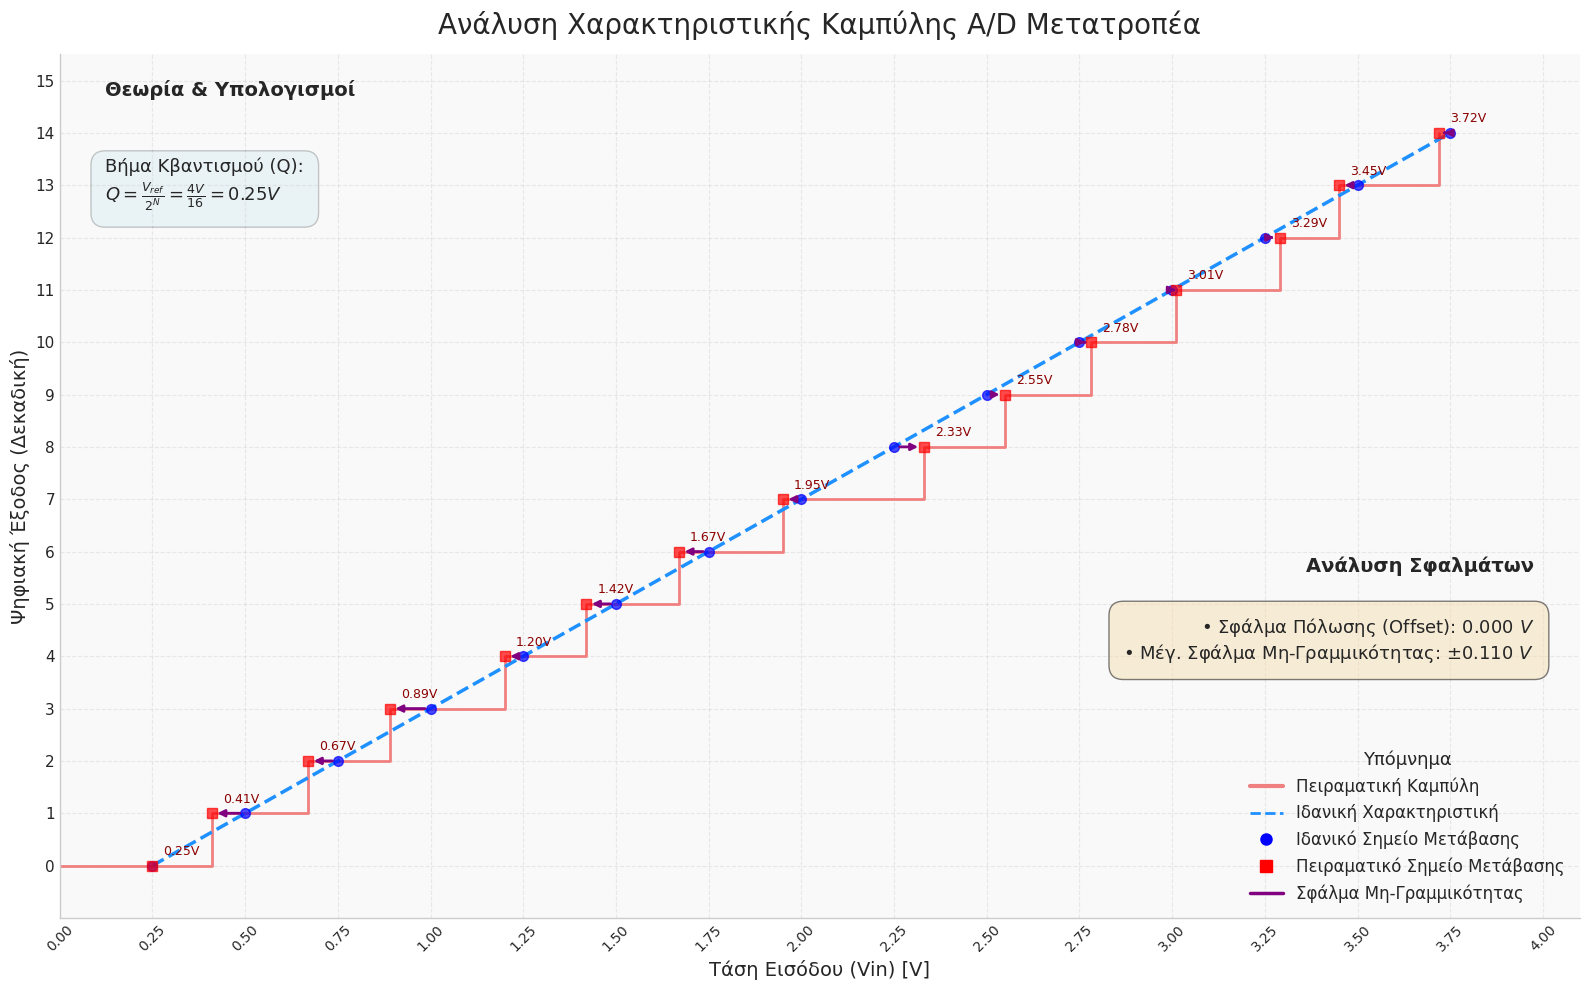

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --- 1. ΔΕΔΟΜΕΝΑ ΚΑΙ ΣΤΑΘΕΡΕΣ ---
N_BITS = 4
V_REF = 4.0
Q_STEP = V_REF / (2**N_BITS)

# Πειραματικές μετρήσεις
MEASURED_TRANSITION_V = np.array([
    0.25, 0.41, 0.67, 0.89, 1.20, 1.42, 1.67, 1.95,
    2.33, 2.55, 2.78, 3.01, 3.29, 3.45, 3.72
])
DIGITAL_CODES = np.arange(1, 16)

# Θεωρητικές τάσεις μετάβασης
THEORETICAL_TRANSITION_V = DIGITAL_CODES * Q_STEP

# --- 2. ΥΠΟΛΟΓΙΣΜΟΙ ΣΦΑΛΜΑΤΩΝ ---
# Σφάλμα Πόλωσης (Offset Error)
OFFSET_ERROR_V = MEASURED_TRANSITION_V[0] - THEORETICAL_TRANSITION_V[0]

# Σφάλμα Μη-Γραμμικότητας (Non-Linearity Error)
linearity_errors = (MEASURED_TRANSITION_V - OFFSET_ERROR_V) - THEORETICAL_TRANSITION_V
MAX_NON_LINEARITY_ERROR = np.max(np.abs(linearity_errors))

# --- 3. ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΤΕΛΙΚΟΥ ΔΙΑΓΡΑΜΜΑΤΟΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans', 'figure.figsize': (16, 10), 'figure.facecolor': 'white',
    'axes.facecolor': '#f9f9f9', 'axes.titlesize': 20, 'axes.labelsize': 14,
    'xtick.labelsize': 10, 'ytick.labelsize': 11, 'legend.fontsize': 12, 'figure.autolayout': True
})

fig, ax = plt.subplots()
ax.set_title('Ανάλυση Χαρακτηριστικής Καμπύλης A/D Μετατροπέα', pad=15)

# --- Σχεδίαση Κύριων Γραμμών ---
ax.step(np.concatenate(([0.0], MEASURED_TRANSITION_V)),
        np.concatenate(([0], DIGITAL_CODES - 1)),
        where='post', color='lightcoral', lw=2, zorder=1)
ax.plot(THEORETICAL_TRANSITION_V, DIGITAL_CODES - 1, linestyle='--', color='dodgerblue', lw=2.5, zorder=2)

# --- Οπτικοποίηση Σφαλμάτων ---
for i in range(len(DIGITAL_CODES)):
    ideal_x, measured_x = THEORETICAL_TRANSITION_V[i], MEASURED_TRANSITION_V[i]
    y_level = DIGITAL_CODES[i] - 1

    ax.plot(ideal_x, y_level, 'o', color='blue', markersize=7, zorder=3, alpha=0.7)
    ax.plot(measured_x, y_level, 's', color='red', markersize=7, zorder=3, alpha=0.7)
    ax.text(measured_x + 0.03, y_level + 0.2, f'{measured_x:.2f}V', ha='left', fontsize=9, color='darkred')
    ax.annotate("", xy=(measured_x, y_level), xytext=(ideal_x, y_level),
                arrowprops=dict(arrowstyle="-|>", color='purple', lw=2, shrinkA=4, shrinkB=4), zorder=4)

# --- Πλαίσια Πληροφοριών ---
ax.text(0.03, 0.97, 'Θεωρία & Υπολογισμοί', transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
formula_text = (
    r'Βήμα Κβαντισμού (Q):' '\n'
    r'$Q = \frac{V_{ref}}{2^N} = \frac{4V}{16} = 0.25V$'
)
ax.text(0.03, 0.88, formula_text, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.2))

legend_elements = [
    Line2D([0], [0], color='lightcoral', lw=3, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], linestyle='--', color='dodgerblue', lw=2, label='Ιδανική Χαρακτηριστική'),
    Line2D([0], [0], marker='o', color='blue', label='Ιδανικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='s', color='red', label='Πειραματικό Σημείο Μετάβασης', markersize=8, linestyle='None'),
    Line2D([0], [0], color='purple', lw=2.5, label=f'Σφάλμα Μη-Γραμμικότητας')
]
legend = ax.legend(handles=legend_elements, title='Υπόμνημα', title_fontsize='13',
                   loc='lower right', fontsize=12, facecolor='white', framealpha=0.6, shadow=True)

results_text = (
    f'• Σφάλμα Πόλωσης (Offset): ${OFFSET_ERROR_V:.3f}\\ V$\n'
    f'• Μέγ. Σφάλμα Μη-Γραμμικότητας: $\\pm {MAX_NON_LINEARITY_ERROR:.3f}\\ V$'
)
ax.text(0.97, 0.35, results_text, transform=ax.transAxes, fontsize=13,
        horizontalalignment='right', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', alpha=0.5))
ax.text(0.97, 0.40, 'Ανάλυση Σφαλμάτων', transform=ax.transAxes, fontsize=14, fontweight='bold', horizontalalignment='right')

# --- Τελικές Ρυθμίσεις ---
ax.set_xlabel('Τάση Εισόδου (Vin) [V]')
ax.set_ylabel('Ψηφιακή Έξοδος (Δεκαδική)')
ax.set_xticks(np.arange(0, V_REF + 0.25, 0.25))
ax.set_yticks(np.arange(0, 16, 1))
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(0, V_REF + 0.1)
ax.set_ylim(-1, 15.5)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, which='both', linestyle='--', alpha=0.4)

plt.savefig('final_adc_plot_new.png', dpi=300)
plt.show()

<>:62: SyntaxWarning: invalid escape sequence '\T'
<>:62: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1856812186.py:62: SyntaxWarning: invalid escape sequence '\T'
  ax.set_xlabel('Διαφορά Θερμοκρασίας (Δθ = $\Theta_{hot} - \Theta_{cold}$) [°C]', fontsize=14)


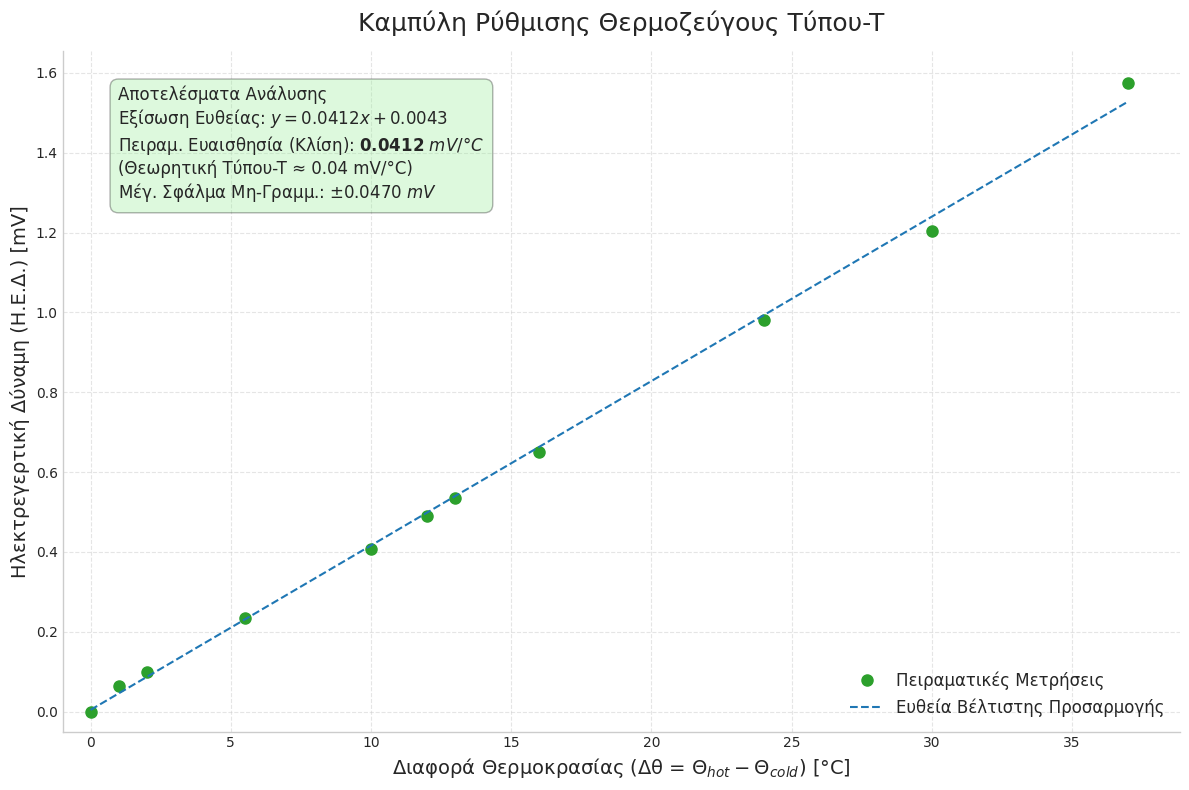

Θεωρητική Ενίσχυση (Gain): 2000.0
Πειραματική Κλίση (Ευαισθησία): 0.0412 mV/°C
Μέγιστο Σφάλμα Μη-Γραμμικότητας: 0.0470 mV
FSI (Εύρος Εισόδου): 37.0 °C
FSO (Εύρος Εξόδου): 1.575 mV


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ---
# (Βάσει των εικόνων IMG_20251021_172331.jpg και IMG_20251021_172300.jpg)

# Θερμοκρασία Θερμής Επαφής (Θ) σε °C
temp_hot = np.array([25, 26, 27, 30.5, 35, 37, 38, 41, 49, 55, 62])
# Ένδειξη Βολτομέτρου (Vout) σε V (από τον πίνακα, οι τιμές είναι σε mV)
volt_out_mv = np.array([0, 127, 200, 470, 815, 980, 1070, 1300, 1960, 2410, 3150])
volt_out_v = volt_out_mv / 1000.0

# --- 2. ΥΠΟΛΟΓΙΣΜΟΙ ---
# Θερμοκρασία Περιβάλλοντος (Ψυχρής Επαφής)
temp_cold = 25.0 # °C (από την πρώτη μέτρηση)

# Ενίσχυση (A_V = 2000, όπως αναφέρεται στην αρχή του LaTeX που έδωσες)
gain = 2000.0

# Υπολογισμός ΗΕΔ (EMF) σε mV
emf_mv = (volt_out_v / gain) * 1000

# Υπολογισμός Διαφοράς Θερμοκρασίας (Δθ)
delta_theta = temp_hot - temp_cold

# --- 3. ΓΡΑΜΜΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ & ΣΦΑΛΜΑ ---
# Εύρεση ευθείας βέλτιστης προσαρμογής (y = mx + b)
# Χρησιμοποιούμε όλα τα σημεία εκτός του πρώτου (0,0) για καλύτερη κλίση
slope, intercept = np.polyfit(delta_theta[1:], emf_mv[1:], 1)

# Δημιουργία γραμμής παλινδρόμησης για σχεδίαση (σε όλο το εύρος)
regression_line = slope * delta_theta + intercept

# Υπολογισμός Σφάλματος Μη-Γραμμικότητας (Μέγιστη απόκλιση από την ευθεία)
# Αγνοούμε το πρώτο σημείο (0,0) καθώς το intercept το διορθώνει
non_linearity_error = np.max(np.abs(emf_mv[1:] - regression_line[1:]))

# --- 4. ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, ax = plt.subplots(figsize=(12, 8))

# Σημεία μετρήσεων
ax.plot(delta_theta, emf_mv, 'o', color='#2ca02c', markersize=8, label='Πειραματικές Μετρήσεις') # Πράσινο

# Ευθεία βέλτιστης προσαρμογής
ax.plot(delta_theta, regression_line, linestyle='--', color='#1f77b4', label='Ευθεία Βέλτιστης Προσαρμογής') # Μπλε

# --- Επισημάνσεις ---
info_text = (
    r'Αποτελέσματα Ανάλυσης' '\n'
    f'Εξίσωση Ευθείας: $y = {slope:.4f}x {intercept:+.4f}$\n'
    f'Πειραμ. Ευαισθησία (Κλίση): $\\mathbf{{{slope:.4f}}}\\ mV/°C$\n'
    f'(Θεωρητική Τύπου-T ≈ 0.04 mV/°C)\n'
    f'Μέγ. Σφάλμα Μη-Γραμμ.: $\\pm {non_linearity_error:.4f}\\ mV$'
)
ax.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.3))

# --- Τελικές Ρυθμίσεις ---
ax.set_title('Καμπύλη Ρύθμισης Θερμοζεύγους Τύπου-T', fontsize=18, pad=15)
ax.set_xlabel('Διαφορά Θερμοκρασίας (Δθ = $\Theta_{hot} - \Theta_{cold}$) [°C]', fontsize=14)
ax.set_ylabel('Ηλεκτρεγερτική Δύναμη (Η.Ε.Δ.) [mV]', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim(left=-1) # Να φαίνεται καθαρά η αρχή των αξόνων
ax.set_ylim(bottom=-0.05) # Προσαρμογή βάσει των νέων τιμών emf

plt.tight_layout()
plt.savefig('thermocouple_plot.png', dpi=300)
plt.show()

# Εκτύπωση αποτελεσμάτων για την αναφορά
print(f"Θεωρητική Ενίσχυση (Gain): {gain:.1f}")
print(f"Πειραματική Κλίση (Ευαισθησία): {slope:.4f} mV/°C")
print(f"Μέγιστο Σφάλμα Μη-Γραμμικότητας: {non_linearity_error:.4f} mV")
print(f"FSI (Εύρος Εισόδου): {delta_theta[-1]:.1f} °C")
print(f"FSO (Εύρος Εξόδου): {emf_mv[-1]:.3f} mV") # Περισσότερα δεκαδικά για το FSO

<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\T'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1899465250.py:42: SyntaxWarning: invalid escape sequence '\p'
  f'Μέγ. Σφάλμα Μη-Γραμμ.:\n  $\\mathbf{{\pm {non_linearity_error:.4f}\\ mV}}$'
/tmp/ipython-input-1899465250.py:58: SyntaxWarning: invalid escape sequence '\T'
  ax.set_xlabel('Διαφορά Θερμοκρασίας (Δθ = $\Theta_{hot} - \Theta_{cold}$) [°C]', fontsize=14)


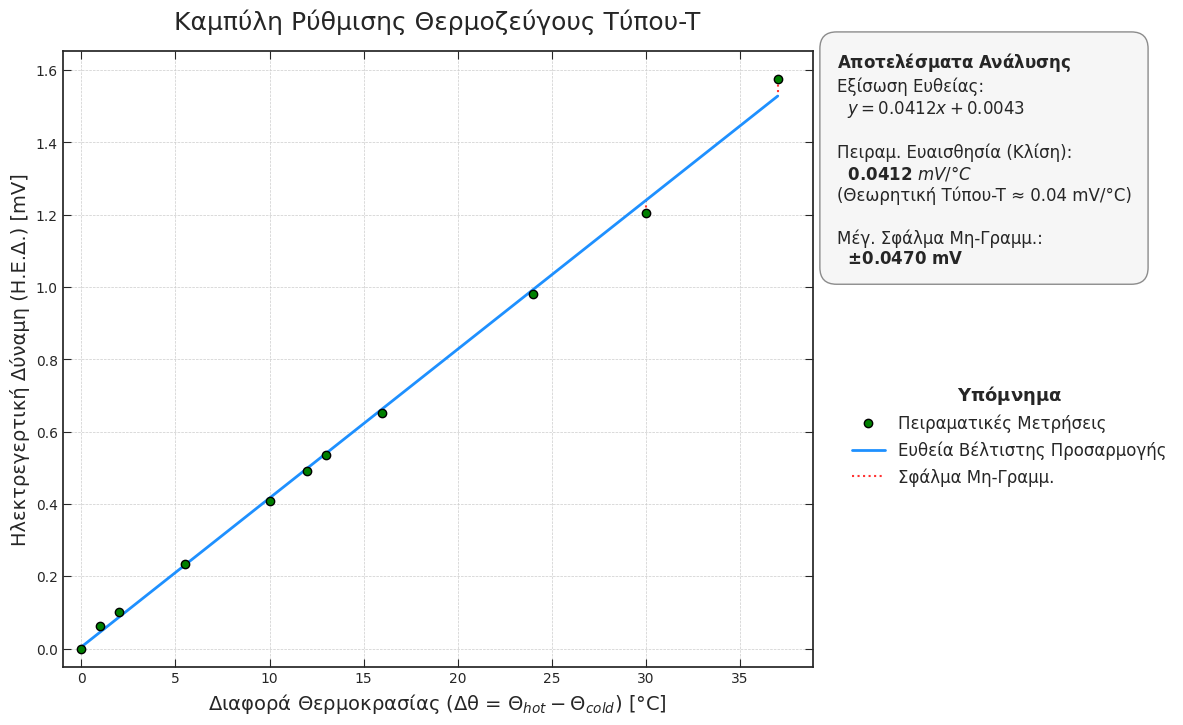

Πειραματική Κλίση (Ευαισθησία): 0.0412 mV/°C
Μέγιστο Σφάλμα Μη-Γραμμικότητας: 0.0470 mV
FSI (Εύρος Εισόδου): 37.0 °C
FSO (Εύρος Εξόδου): 1.575 mV


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ---
temp_hot = np.array([25, 26, 27, 30.5, 35, 37, 38, 41, 49, 55, 62])
volt_out_mv = np.array([0, 127, 200, 470, 815, 980, 1070, 1300, 1960, 2410, 3150])
volt_out_v = volt_out_mv / 1000.0

# --- 2. ΥΠΟΛΟΓΙΣΜΟΙ ---
temp_cold = 25.0 # °C
gain = 2000.0
emf_mv = (volt_out_v / gain) * 1000
delta_theta = temp_hot - temp_cold

# --- 3. ΓΡΑΜΜΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ & ΣΦΑΛΜΑΤΑ ---
slope, intercept = np.polyfit(delta_theta[1:], emf_mv[1:], 1) # Χωρίς το (0,0)
regression_line = slope * delta_theta + intercept
residuals = emf_mv - regression_line # Διαφορές για κάθε σημείο
non_linearity_error = np.max(np.abs(residuals[1:])) # Μέγιστο σφάλμα (εκτός του 0,0)

# --- 4. ΔΗΜΙΟΥΡΓΙΑ ΒΕΛΤΙΩΜΕΝΗΣ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ ---
plt.style.use('seaborn-v0_8-ticks') # Πιο επιστημονικό στυλ
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(right=0.75) # Χώρος για πληροφορίες

# Σημεία μετρήσεων (πιο διακριτά)
ax.plot(delta_theta, emf_mv, 'o', color='black', markersize=6, markerfacecolor='green', label='Πειραματικές Μετρήσεις', zorder=3)

# Ευθεία βέλτιστης προσαρμογής
ax.plot(delta_theta, regression_line, linestyle='-', color='dodgerblue', lw=2, label='Ευθεία Βέλτιστης Προσαρμογής', zorder=2)

# Οπτικοποίηση Σφαλμάτων (Residuals)
ax.vlines(delta_theta[1:], emf_mv[1:], regression_line[1:], color='red', linestyle=':', lw=1.5, label='Σφάλμα Μη-Γραμμ.', zorder=1, alpha=0.8)

# --- Πάνελ Πληροφοριών ---
info_text = (
    r'$\bf{Αποτελέσματα\ Ανάλυσης}$' '\n'
    f'Εξίσωση Ευθείας:\n  $y = {slope:.4f}x {intercept:+.4f}$\n\n'
    f'Πειραμ. Ευαισθησία (Κλίση):\n  $\\mathbf{{{slope:.4f}}}\\ mV/°C$\n'
    f'(Θεωρητική Τύπου-T ≈ 0.04 mV/°C)\n\n'
    f'Μέγ. Σφάλμα Μη-Γραμμ.:\n  $\\mathbf{{\pm {non_linearity_error:.4f}\\ mV}}$'
)
fig.text(0.77, 0.88, info_text, ha='left', va='top', fontsize=12,
         bbox=dict(boxstyle='round,pad=1', facecolor='whitesmoke', alpha=0.9, edgecolor='grey'))

# --- Υπόμνημα ---
handles, labels = ax.get_legend_handles_labels()
# Ταξινόμηση για καλύτερη σειρά στο υπόμνημα
order = [0, 1, 2]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc='center left', bbox_to_anchor=(0.77, 0.4),
           fontsize=12, title=r'$\bf{Υπόμνημα}$', title_fontsize='13', frameon=False)


# --- Τελικές Ρυθμίσεις ---
ax.set_title('Καμπύλη Ρύθμισης Θερμοζεύγους Τύπου-T', fontsize=18, pad=15)
ax.set_xlabel('Διαφορά Θερμοκρασίας (Δθ = $\Theta_{hot} - \Theta_{cold}$) [°C]', fontsize=14)
ax.set_ylabel('Ηλεκτρεγερτική Δύναμη (Η.Ε.Δ.) [mV]', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5) # Πιο διακριτικό grid
ax.tick_params(direction='in', top=True, right=True) # Ticks προς τα μέσα
ax.spines[['top', 'right']].set_visible(True) # Εμφάνιση όλων των αξόνων
ax.set_xlim(left=-1)
ax.set_ylim(bottom=-0.05)

plt.savefig('thermocouple_plot_final.png', dpi=300, bbox_inches='tight')
plt.show()

# Εκτύπωση αποτελεσμάτων για την αναφορά
print(f"Πειραματική Κλίση (Ευαισθησία): {slope:.4f} mV/°C")
print(f"Μέγιστο Σφάλμα Μη-Γραμμικότητας: {non_linearity_error:.4f} mV")
print(f"FSI (Εύρος Εισόδου): {delta_theta[-1]:.1f} °C")
print(f"FSO (Εύρος Εξόδου): {emf_mv[-1]:.3f} mV")